# 基于组分特征的关于e_ionic的分组模型 

[TOC]

In [1]:
# 导库
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression

In [2]:
# 一些参数
TEST_SIZE = 0.30
RANDOM_STATE = 42
N_SPLITS = 10
# 决策树的深度
BEST_DEPTH_0 = None
BEST_DEPTH_4 = None

In [3]:
# 导入数据
data = pd.read_csv('../../data/groups/composition_features_groups/data_clusters_ionic.csv')
data.head()

,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,cluster,class
0,5.369542,2.132453,3.237090,20.0,53.0,33.0,42.000000,14.666667,53.0,7.0,...,0.000000,0.0,64.0,225.0,161.0,117.666667,71.555556,64.0,7,train
1,20.952346,13.461579,7.490766,16.0,59.0,43.0,31.428571,17.632653,16.0,8.0,...,0.000000,0.0,70.0,225.0,155.0,127.571429,65.795918,70.0,7,train
2,46.967161,42.005900,4.961261,8.0,73.0,65.0,25.400000,21.760000,8.0,9.0,...,0.000001,0.0,12.0,229.0,217.0,95.300000,99.960000,12.0,3,train
3,9.885204,6.939711,2.945493,17.0,82.0,65.0,32.666667,20.888889,17.0,5.0,...,0.000000,0.0,64.0,229.0,165.0,118.555556,72.740741,64.0,4,train
4,8.808742,5.420374,3.388368,8.0,32.0,24.0,13.600000,7.360000,8.0,68.0,...,0.000000,0.0,12.0,225.0,213.0,91.000000,94.800000,12.0,9,train


In [4]:
X_train = data[data['class'] == 'train']
X_test = data[data['class'] == 'test']
display(X_train.head())
display(X_test.head())
print(X_train.shape)
print(X_test.shape)

,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,cluster,class
0,5.369542,2.132453,3.237090,20.0,53.0,33.0,42.000000,14.666667,53.0,7.0,...,0.000000,0.0,64.0,225.0,161.0,117.666667,71.555556,64.0,7,train
1,20.952346,13.461579,7.490766,16.0,59.0,43.0,31.428571,17.632653,16.0,8.0,...,0.000000,0.0,70.0,225.0,155.0,127.571429,65.795918,70.0,7,train
2,46.967161,42.005900,4.961261,8.0,73.0,65.0,25.400000,21.760000,8.0,9.0,...,0.000001,0.0,12.0,229.0,217.0,95.300000,99.960000,12.0,3,train
3,9.885204,6.939711,2.945493,17.0,82.0,65.0,32.666667,20.888889,17.0,5.0,...,0.000000,0.0,64.0,229.0,165.0,118.555556,72.740741,64.0,4,train
4,8.808742,5.420374,3.388368,8.0,32.0,24.0,13.600000,7.360000,8.0,68.0,...,0.000000,0.0,12.0,225.0,213.0,91.000000,94.800000,12.0,9,train


,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,cluster,class
5093,14.078999,6.862966,7.216033,3.0,25.0,22.0,12.769231,7.372781,8.0,1.0,...,0.000110,0.0,12.0,229.0,217.0,92.692308,99.313609,12.0,6,test
5094,23.198326,15.958896,7.239430,8.0,57.0,49.0,29.750000,18.166667,16.0,13.0,...,0.000047,0.0,12.0,217.0,205.0,118.750000,66.541667,70.0,0,test
5095,21.690907,11.098378,10.592529,29.0,57.0,28.0,38.500000,9.250000,34.0,13.0,...,0.000000,0.0,14.0,225.0,211.0,111.750000,97.750000,14.0,7,test
5096,37.388675,30.495613,6.893062,1.0,20.0,19.0,8.857143,6.367347,6.0,1.0,...,0.000000,0.0,194.0,229.0,35.0,207.857143,15.836735,194.0,8,test
5097,11.310439,3.828769,7.481670,13.0,47.0,34.0,29.400000,9.040000,34.0,65.0,...,0.000000,0.0,2.0,225.0,223.0,53.800000,68.480000,14.0,7,test


(5093, 137)
(2184, 137)


In [5]:
# 移除不需要的列
X_train = X_train.drop(['class'], axis=1)
X_test = X_test.drop(['class'], axis=1)
display(X_train.head())
display(X_test.head())

,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,cluster
0,5.369542,2.132453,3.237090,20.0,53.0,33.0,42.000000,14.666667,53.0,7.0,...,0.000000e+00,0.000000,0.0,64.0,225.0,161.0,117.666667,71.555556,64.0,7
1,20.952346,13.461579,7.490766,16.0,59.0,43.0,31.428571,17.632653,16.0,8.0,...,0.000000e+00,0.000000,0.0,70.0,225.0,155.0,127.571429,65.795918,70.0,7
2,46.967161,42.005900,4.961261,8.0,73.0,65.0,25.400000,21.760000,8.0,9.0,...,6.350000e-07,0.000001,0.0,12.0,229.0,217.0,95.300000,99.960000,12.0,3
3,9.885204,6.939711,2.945493,17.0,82.0,65.0,32.666667,20.888889,17.0,5.0,...,0.000000e+00,0.000000,0.0,64.0,229.0,165.0,118.555556,72.740741,64.0,4
4,8.808742,5.420374,3.388368,8.0,32.0,24.0,13.600000,7.360000,8.0,68.0,...,0.000000e+00,0.000000,0.0,12.0,225.0,213.0,91.000000,94.800000,12.0,9


,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,cluster
5093,14.078999,6.862966,7.216033,3.0,25.0,22.0,12.769231,7.372781,8.0,1.0,...,0.000072,0.000110,0.0,12.0,229.0,217.0,92.692308,99.313609,12.0,6
5094,23.198326,15.958896,7.239430,8.0,57.0,49.0,29.750000,18.166667,16.0,13.0,...,0.000026,0.000047,0.0,12.0,217.0,205.0,118.750000,66.541667,70.0,0
5095,21.690907,11.098378,10.592529,29.0,57.0,28.0,38.500000,9.250000,34.0,13.0,...,0.000000,0.000000,0.0,14.0,225.0,211.0,111.750000,97.750000,14.0,7
5096,37.388675,30.495613,6.893062,1.0,20.0,19.0,8.857143,6.367347,6.0,1.0,...,0.000000,0.000000,0.0,194.0,229.0,35.0,207.857143,15.836735,194.0,8
5097,11.310439,3.828769,7.481670,13.0,47.0,34.0,29.400000,9.040000,34.0,65.0,...,0.000000,0.000000,0.0,2.0,225.0,223.0,53.800000,68.480000,14.0,7


## 进行特征缩放，归一化

In [6]:
def get_X_y(data_group):
    X = data_group.drop(columns=['e_total', 'e_ionic', 'e_electronic'])
    y = data_group['e_ionic']
    return X, y

In [7]:
def scale(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # X_scaled用于后面模型测试
    return scaler, X_scaled

## 进行模型训练

In [8]:
def model_cross_train(model, X, y):
    '''在X上训练模型model，返回交叉验证的结果：
        1. scores（neg_root_mean_squared_error）
        2. y_hat'''
    # 进行k折交叉验证
    # cross_val_predict()函数不会改变原始的模型。这个函数的主要目的是使用交叉验证来为每个输入数据点生成预测值。
    kfold = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
    y_hat = cross_val_predict(model, X, y, cv=kfold)
    return scores, y_hat

In [9]:
# 确定好全部超参数后，使用最优的超参数在整个训练集上训练模型
def model_final_train(model, X_train, y_train):
    '''在整个训练集上训练模型model，返回训练好的模型'''
    model.fit(X_train, y_train)
    return model

def model_eval(model, X_test, y_test):
    '''在测试集上测试模型model，返回测试结果：
        1. mean_squared_error
        2. mean_absolute_error
        3. y_pred'''
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, mae, y_pred

In [10]:
def plot_cross_val_scores(mse, mae, y_hat, y_train):
    '''绘制交叉验证的结果'''
    print(f'MSE: {mse}, MAE: {mae}')

    # 绘制parity plot
    fig, ax = plt.subplots(dpi=300)
    ax.scatter(y_train, y_hat, s=1)
    ax.plot(y_train, y_train, c='k', zorder=-5)
    ax.set_xlabel('Actual $\epsilon_{ionic}$')
    ax.set_ylabel('Predicted $\epsilon_{ionic}$')
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 50)
    plt.show()


#### 1. LinearRegression模型 

In [11]:
def linear_regression(X_train, y_train):
    # 模型训练
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    # 模型训练集测试
    mse, mae, y_pred = model_eval(lr, X_train, y_train)
    # 绘制结果
    plot_cross_val_scores(mse, mae, y_pred, y_train)
    return lr
# 这里没有使用交叉验证


MSE: 1081.3960201639013, MAE: 11.94270403959696


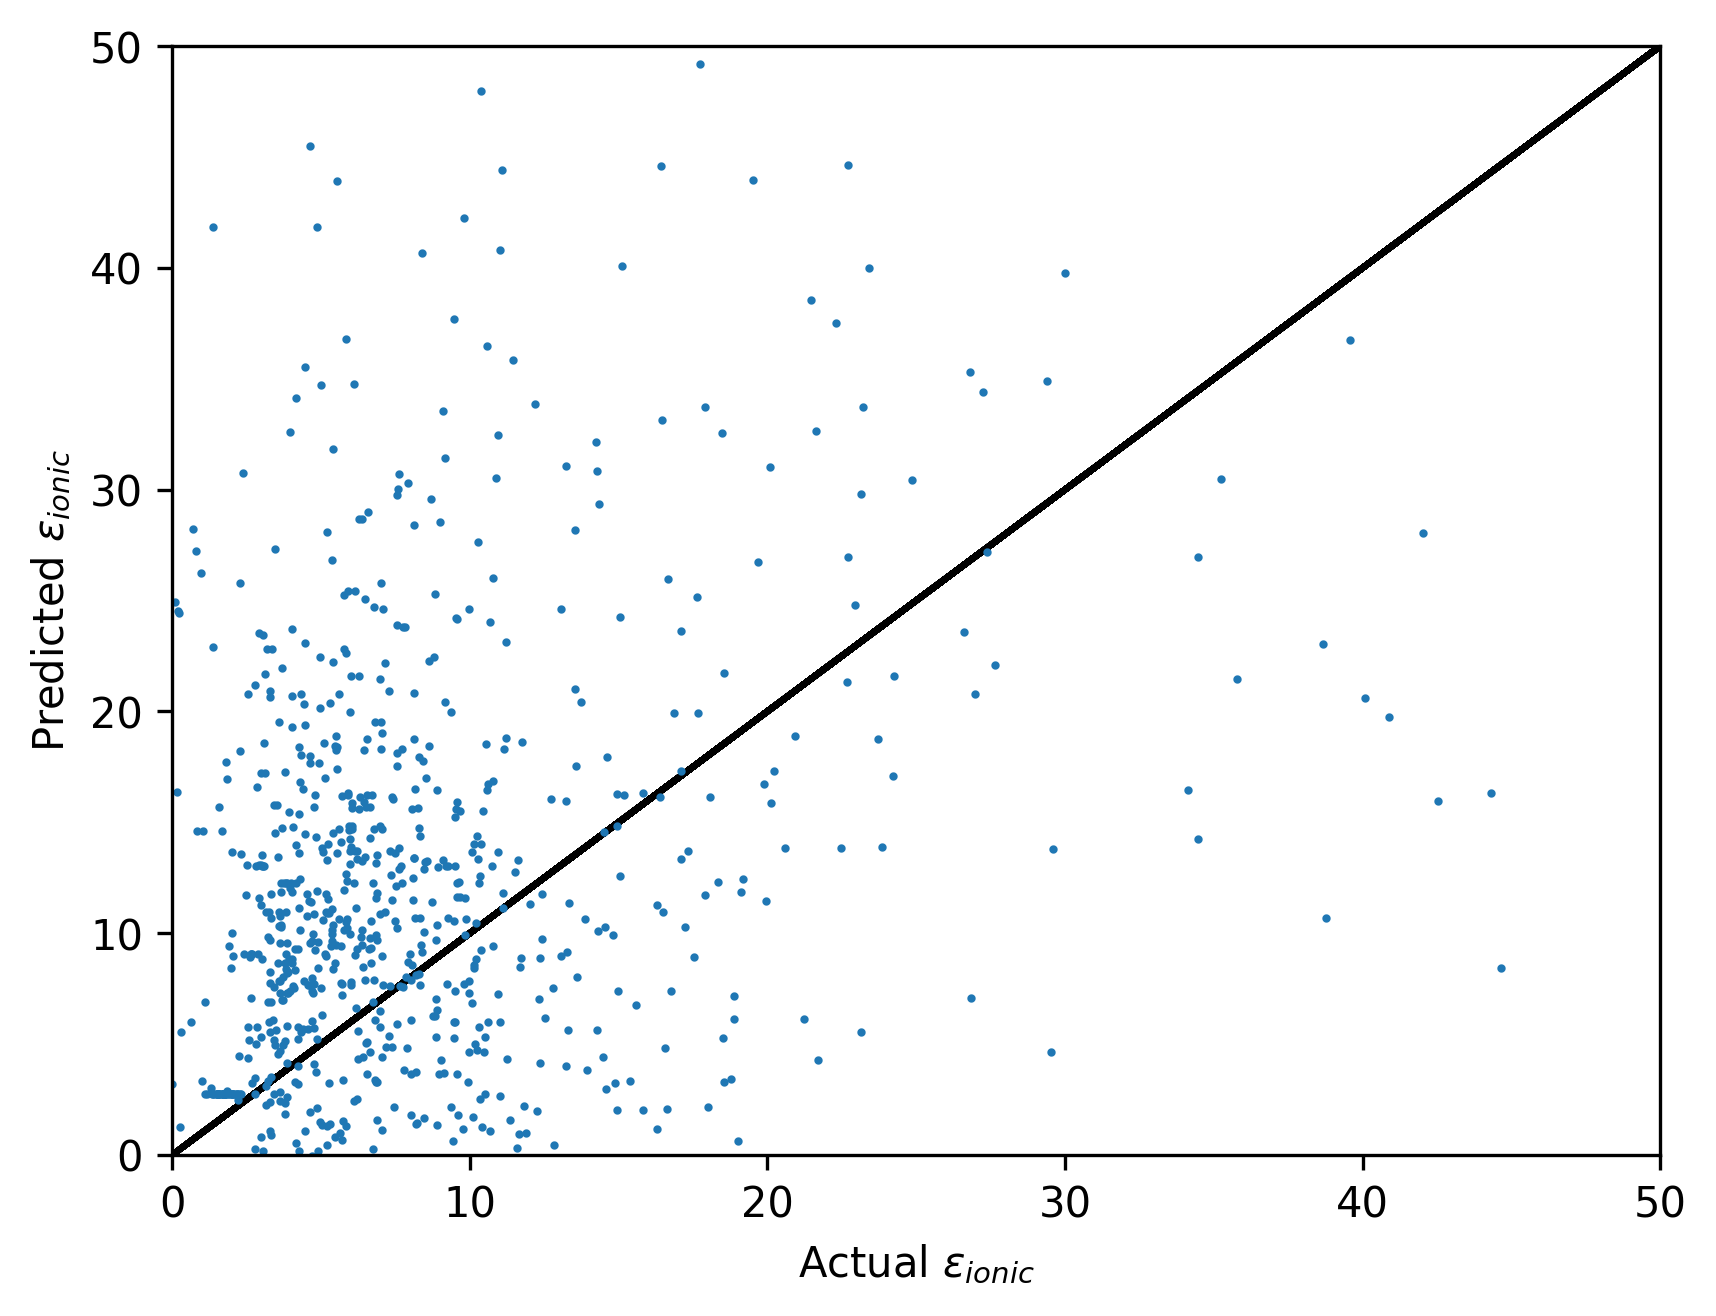

MSE: 10693.865503217117, MAE: 38.41266617608394


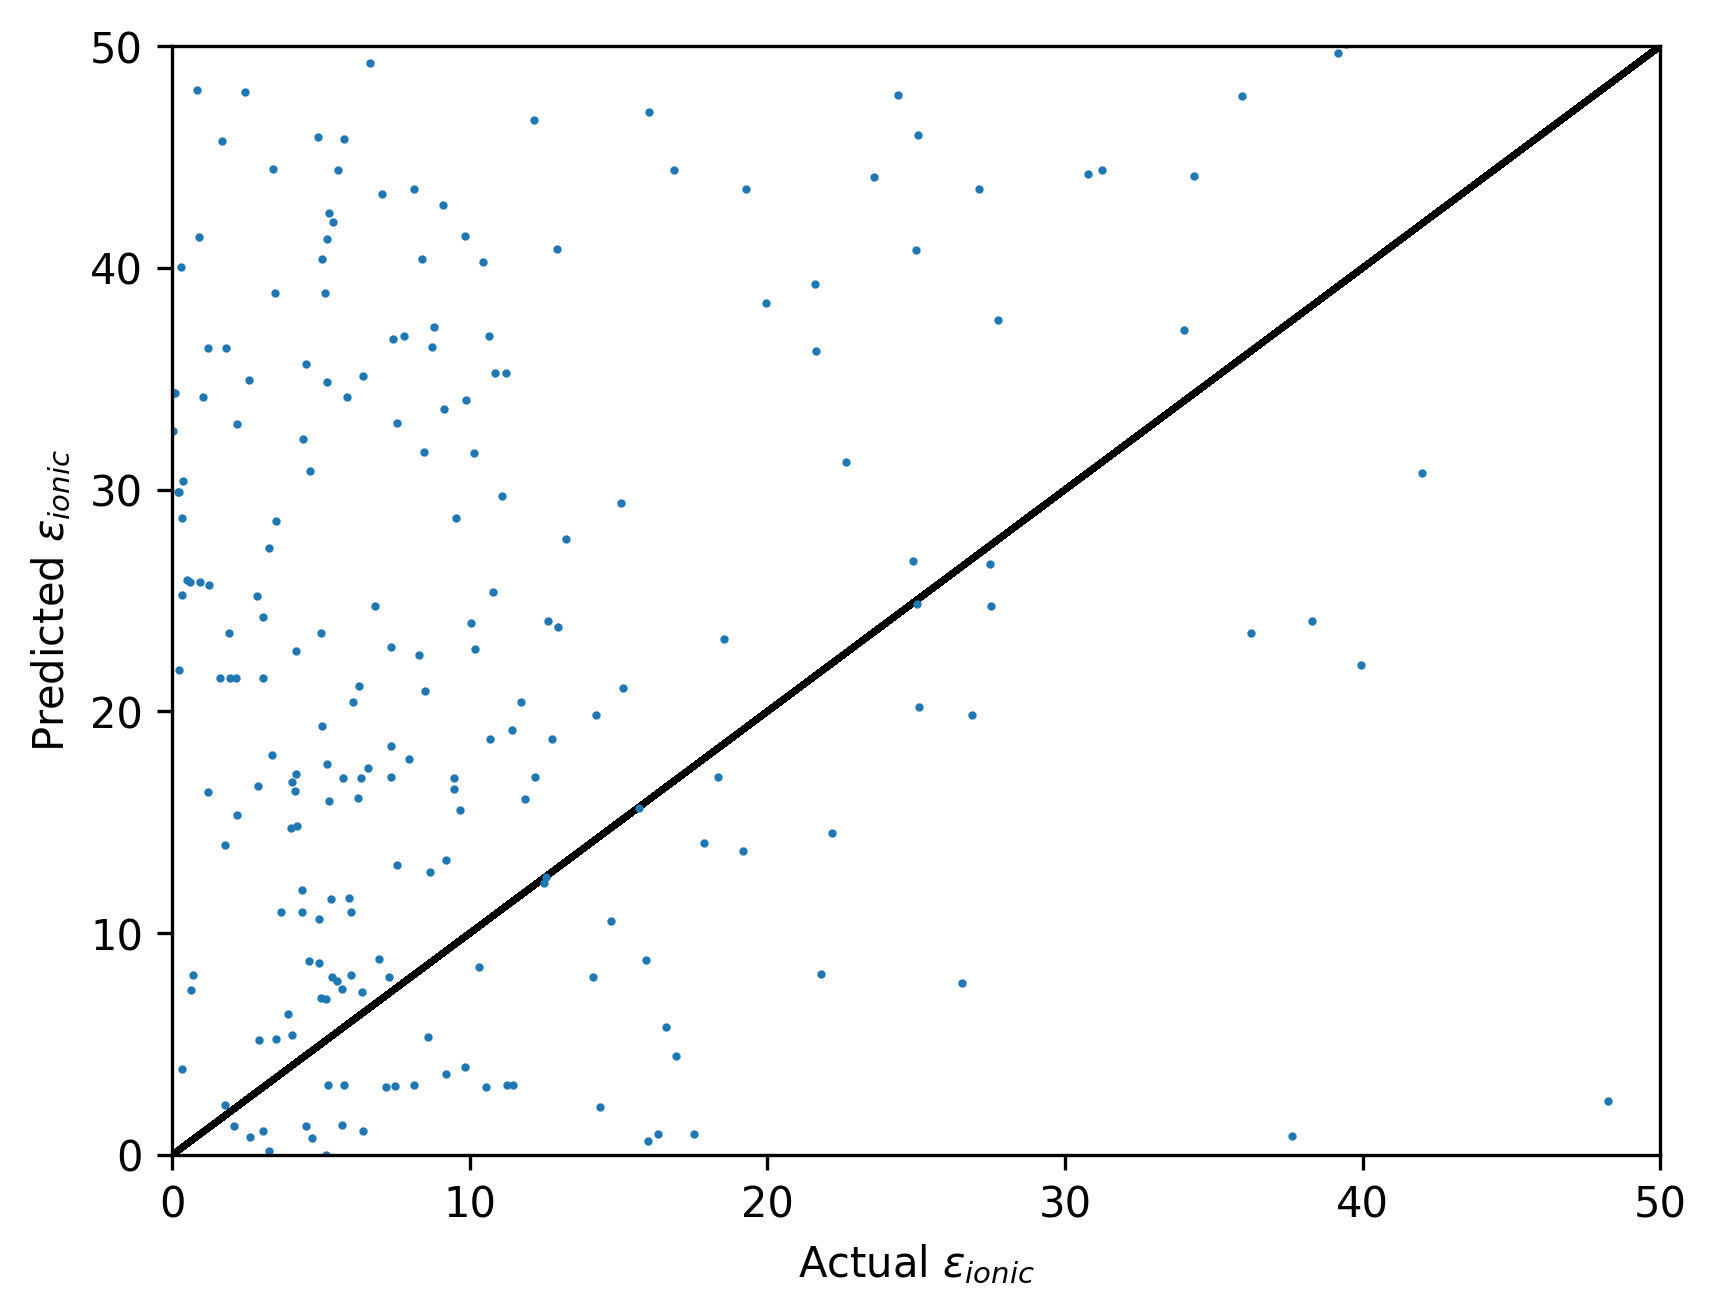

MSE: 533.687329749415, MAE: 10.09583398574892


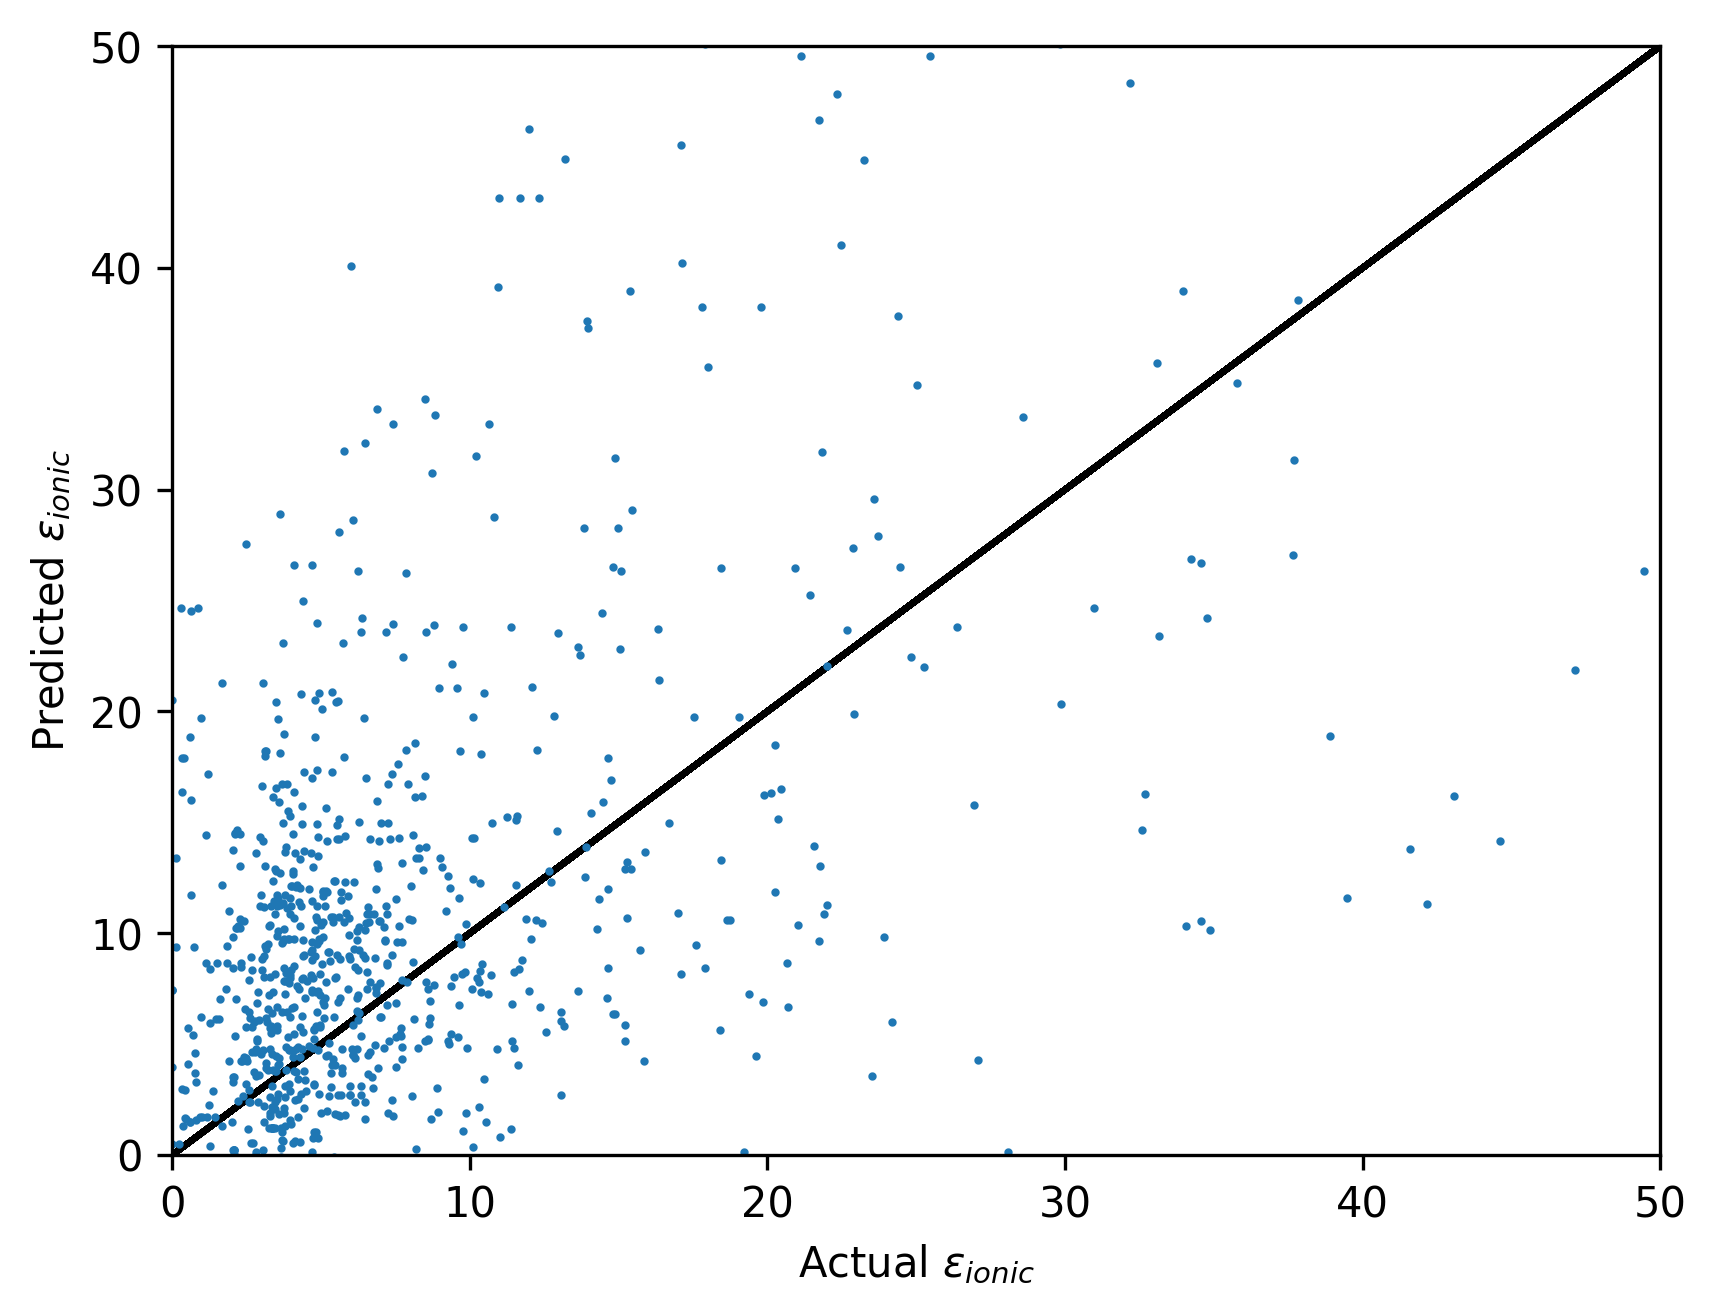

MSE: 5153.782363389084, MAE: 19.95520825540952


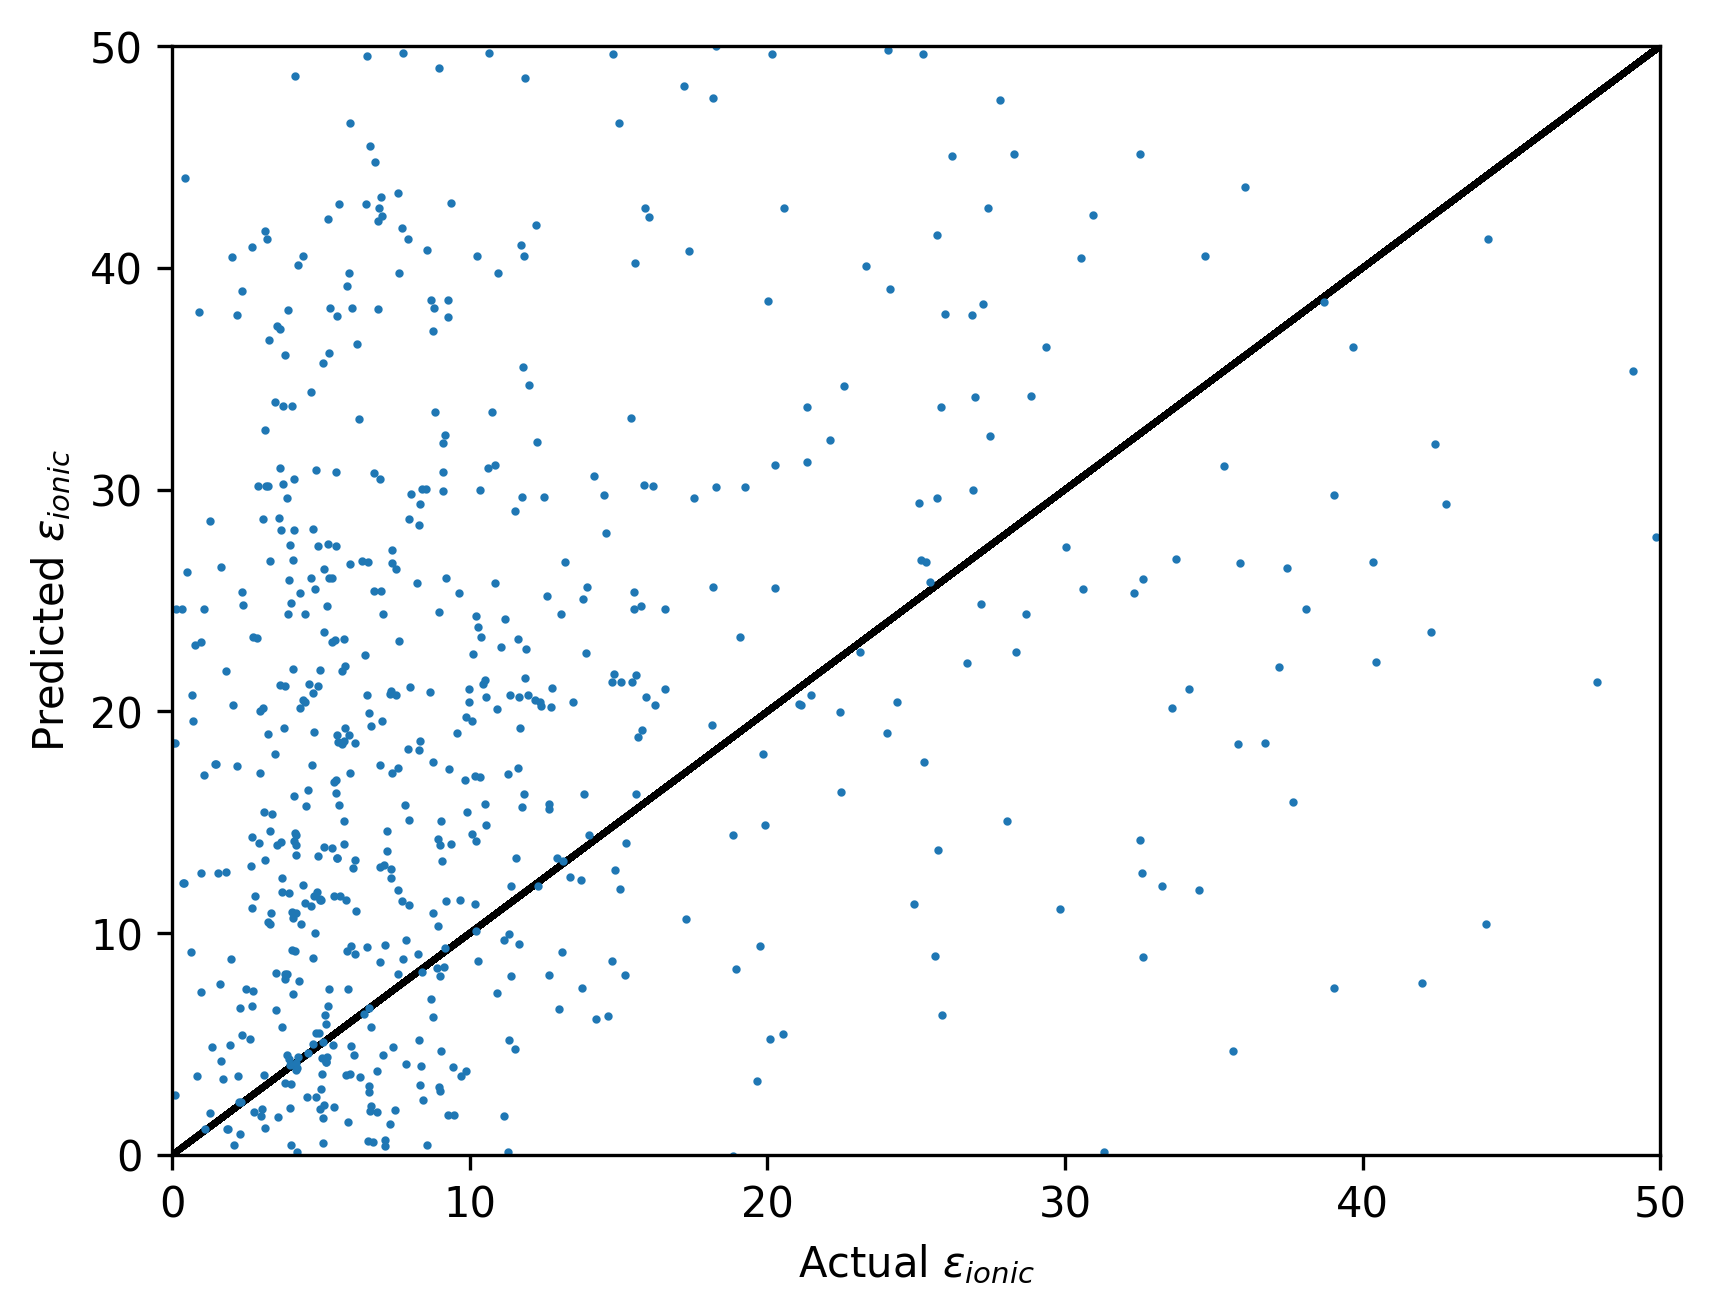

MSE: 1842.8348001276495, MAE: 18.0755839013513


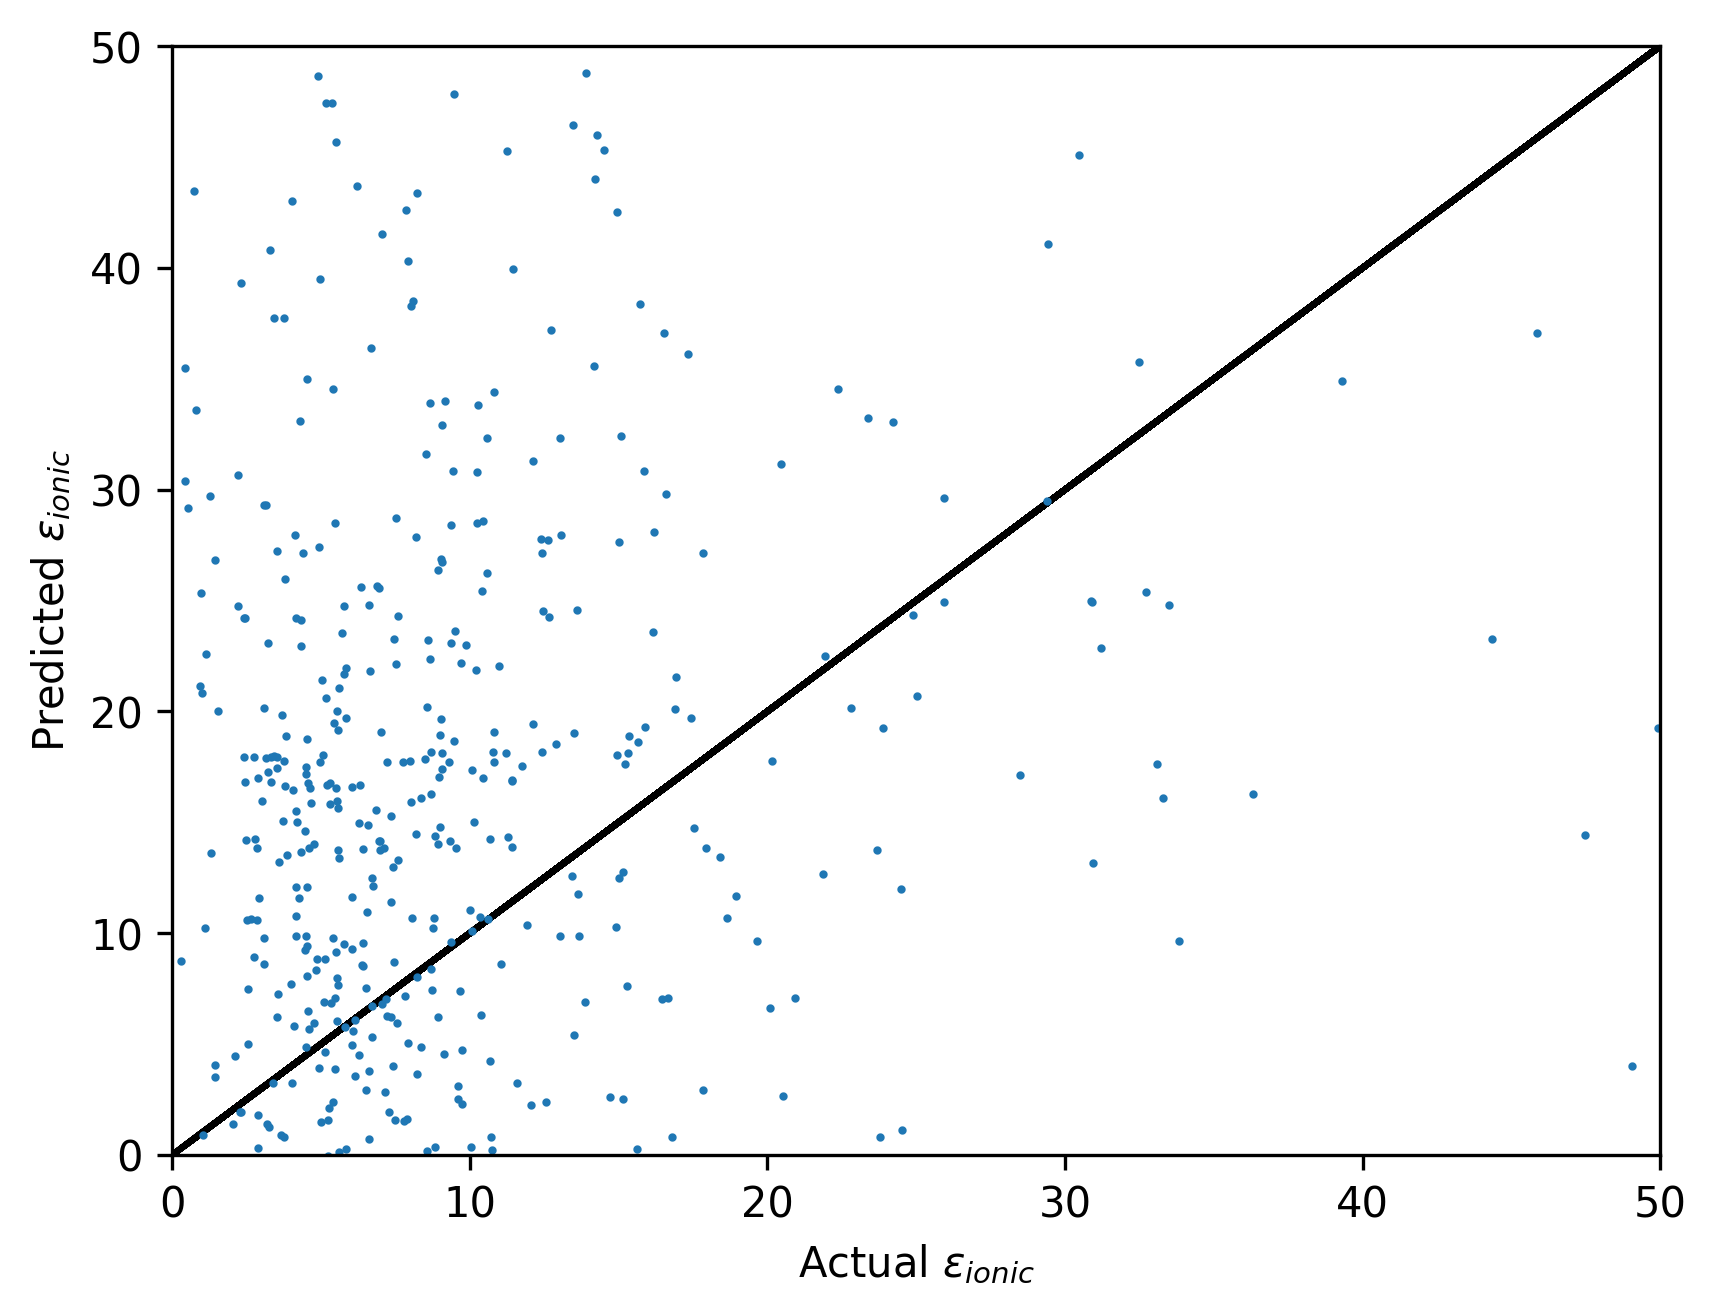

MSE: 240.13578365840098, MAE: 6.423555005999974


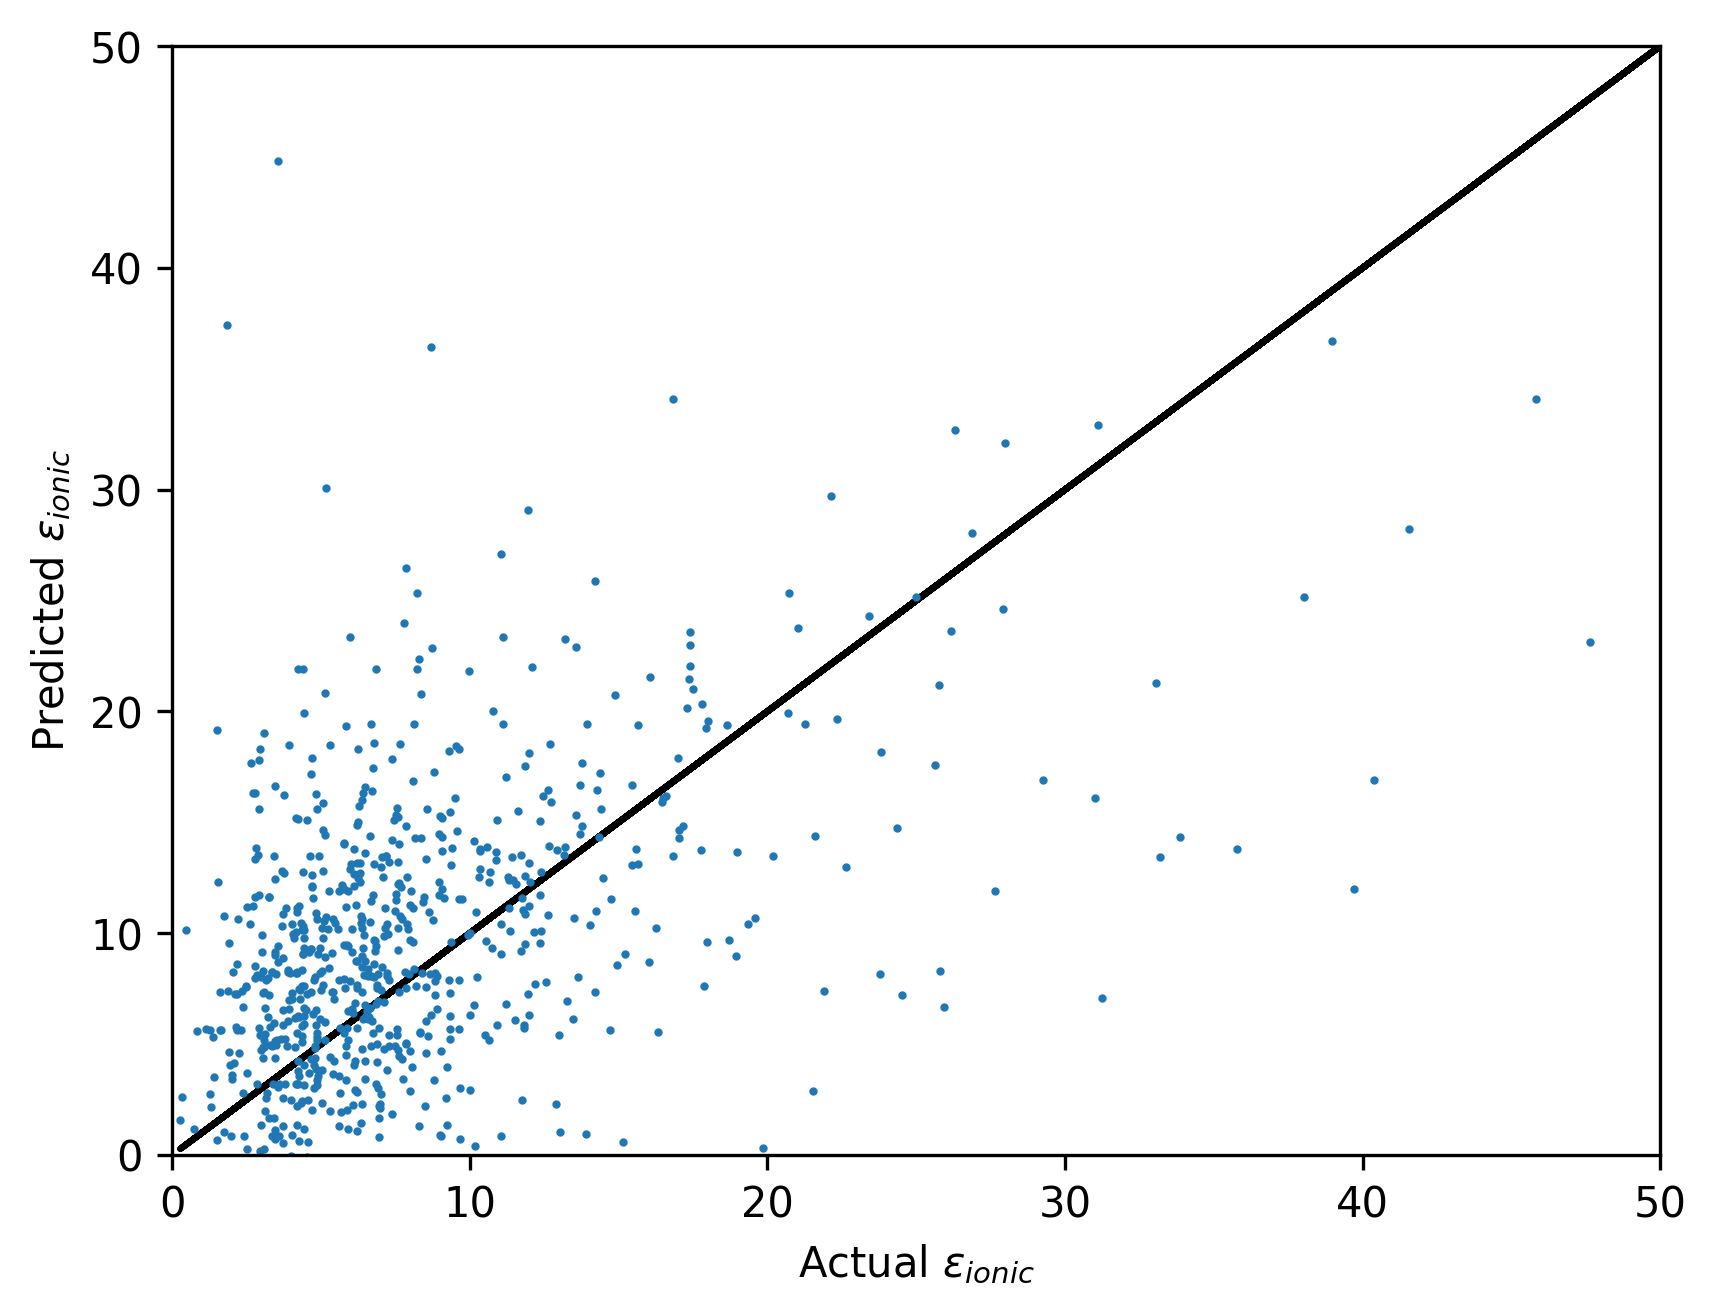

In [12]:
grouped_data = X_train.groupby('cluster')
# 对每个group进行训练
lr_models = {}
lr_scalers = {}
for group, data_group in grouped_data:
    # 仅训练数据量超过400个的
    if len(data_group) < 400:
        continue
    X, y = get_X_y(data_group)
    scaler, X_scaled = scale(X)
    lr = linear_regression(X_scaled, y)
    lr_models[group] = lr
    lr_scalers[group] = scaler


In [13]:
lr_models

{0: LinearRegression(),
 3: LinearRegression(),
 4: LinearRegression(),
 6: LinearRegression(),
 7: LinearRegression(),
 9: LinearRegression()}

In [14]:
lr_scalers

{0: StandardScaler(),
 3: StandardScaler(),
 4: StandardScaler(),
 6: StandardScaler(),
 7: StandardScaler(),
 9: StandardScaler()}

##### 模型测试

In [15]:
for index, test_item in X_test.iterrows():
    print(test_item)
    display(pd.DataFrame(test_item).T)
    break

e_total                                 14.078999
e_ionic                                  6.862966
e_electronic                             7.216033
MagpieData minimum Number                3.000000
MagpieData maximum Number               25.000000
                                          ...    
MagpieData range SpaceGroupNumber      217.000000
MagpieData mean SpaceGroupNumber        92.692308
MagpieData avg_dev SpaceGroupNumber     99.313609
MagpieData mode SpaceGroupNumber        12.000000
cluster                                  6.000000
Name: 5093, Length: 136, dtype: float64


,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,cluster
5093,14.078999,6.862966,7.216033,3.0,25.0,22.0,12.769231,7.372781,8.0,1.0,...,0.000072,0.00011,0.0,12.0,229.0,217.0,92.692308,99.313609,12.0,6.0


In [16]:
# 模型测试
def model_test(X_test, models, scalers):
    X_test_copy = X_test.copy()
    y_preds = []
    for index, test_item in X_test_copy.iterrows():
        cluster = test_item['cluster']
        if cluster not in models.keys():
            y_preds.append(None)
            continue
        X_item = test_item.drop(['e_total', 'e_ionic', 'e_electronic'])
        X_item_scaled = scalers[cluster].transform(pd.DataFrame(X_item).T)

        y_pred = models[cluster].predict(X_item_scaled)
        y_preds.append(y_pred[0])
        # print(f'Cluster: {cluster}, Predicted e_electronic: {y_pred[0]}')
        
    X_test_copy['e_ionic_pred'] = y_preds
    X_test_copy.dropna(axis=0, inplace=True)
    mse = mean_squared_error(X_test_copy['e_ionic'], X_test_copy['e_ionic_pred'])
    mae = mean_absolute_error(X_test_copy['e_ionic'], X_test_copy['e_ionic_pred'])
    plot_cross_val_scores(mse, mae, X_test_copy['e_ionic_pred'], X_test_copy['e_ionic'])

    return mse, mae, X_test_copy

MSE: 1.2176976331739198e+20, MAE: 245832960.54377174


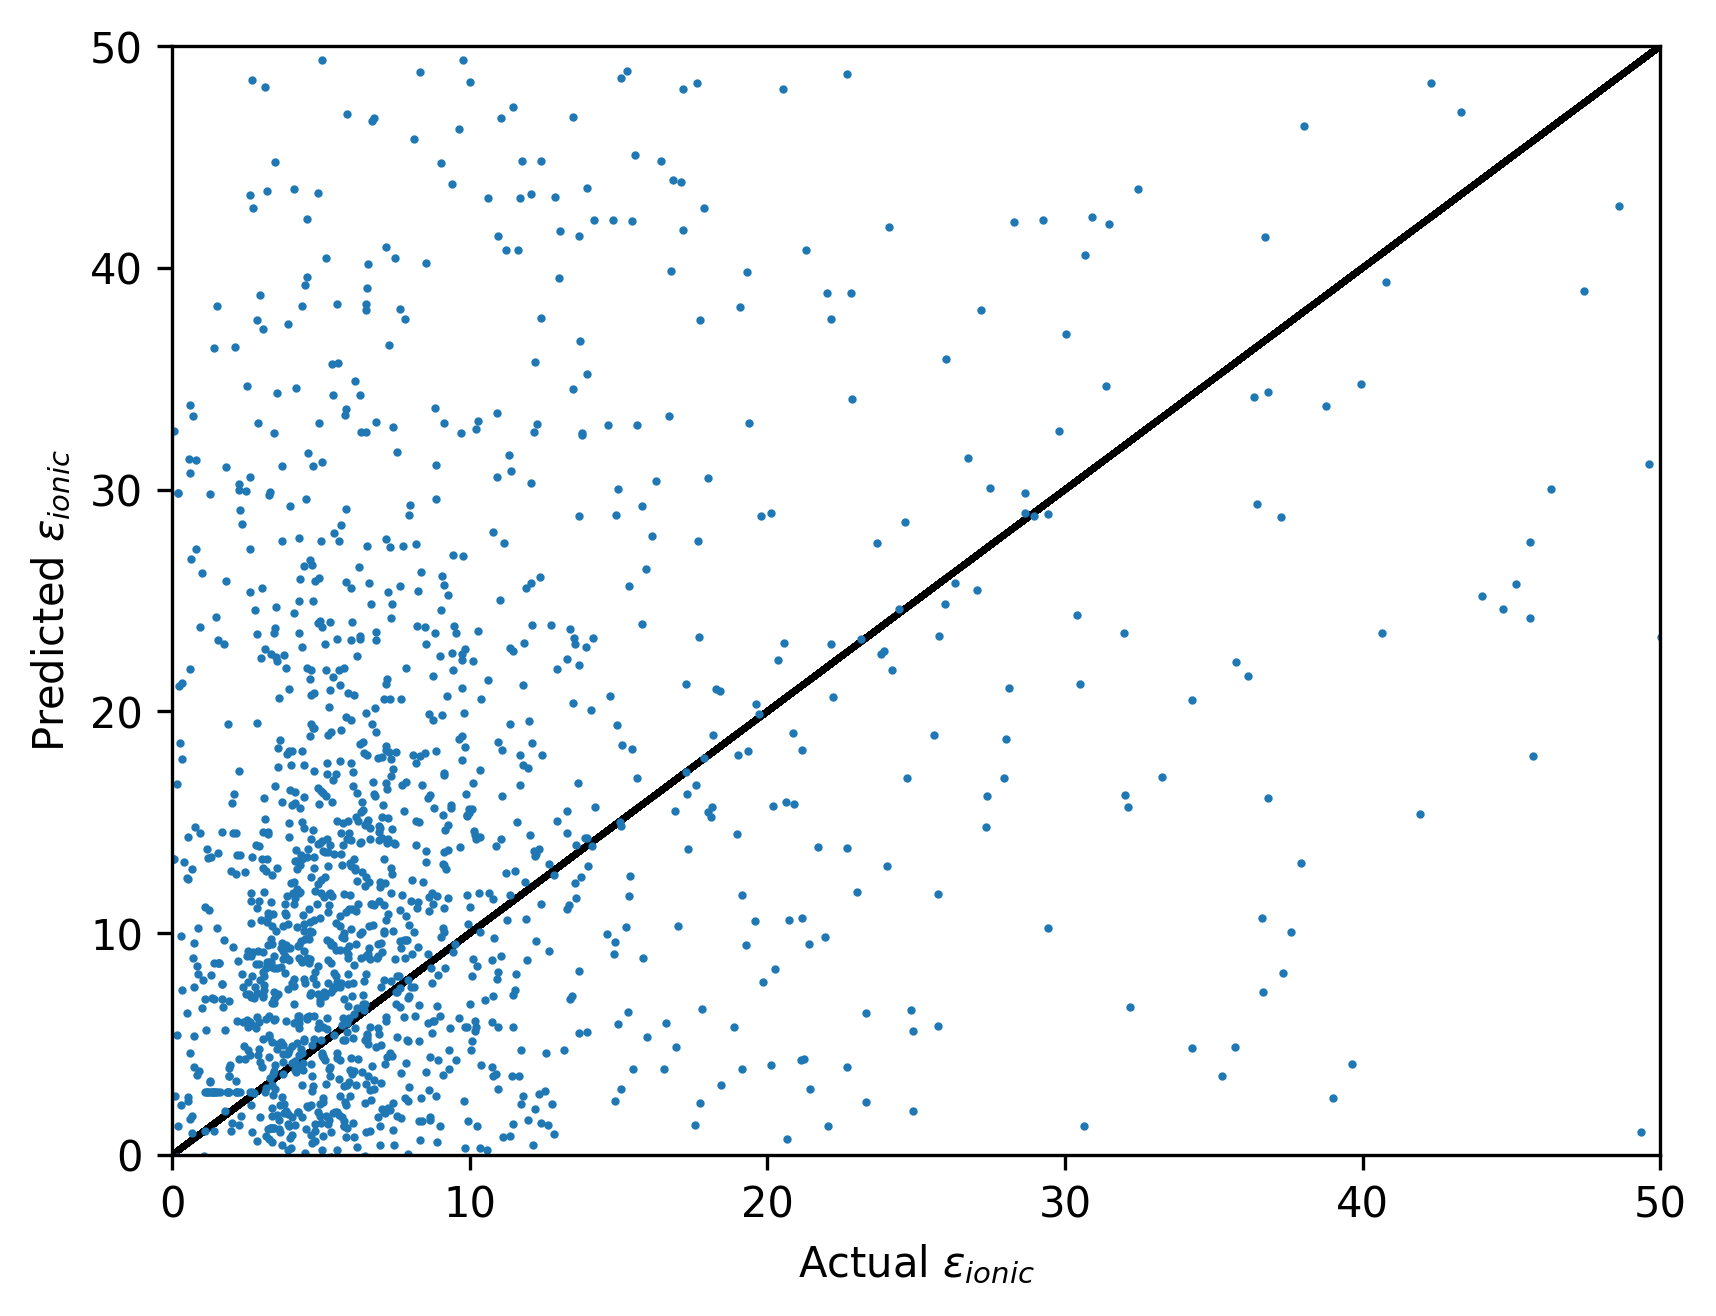

In [17]:
model_test(X_test, lr_models, lr_scalers);

#### 2. 决策树模型


In [18]:
from sklearn.tree import DecisionTreeRegressor, plot_tree       # ML model

def decision_tree(X_train, y_train):
    # 进行交叉验证选择最好的深度

    max_scores=-1e5
    best_depth = 0
    for depth in range(5, 15):
        dt = DecisionTreeRegressor(max_depth=depth,random_state=RANDOM_STATE)      # decision tree constructor
        scores, y_hat = model_cross_train(dt, X_train, y_train)                              
        if scores.mean() > max_scores:
            max_scores = scores.mean()
            best_depth = depth
            # plot_cross_val_scores(scores.mean(), None, y_hat, y_train)
    # 确定超参数MAX_DEPTH后，使用最优的超参数在整个训练集上训练模型
    # 模型训练
    dt = DecisionTreeRegressor(max_depth=best_depth, random_state=RANDOM_STATE)
    dt.fit(X_train, y_train)
    # 模型训练集测试
    mse, mae, y_pred = model_eval(dt, X_train, y_train)
    # 绘制结果
    plot_cross_val_scores(mse, mae, y_pred, y_train)
    return dt, best_depth

MSE: 64.65262361032732, MAE: 2.243945702217395


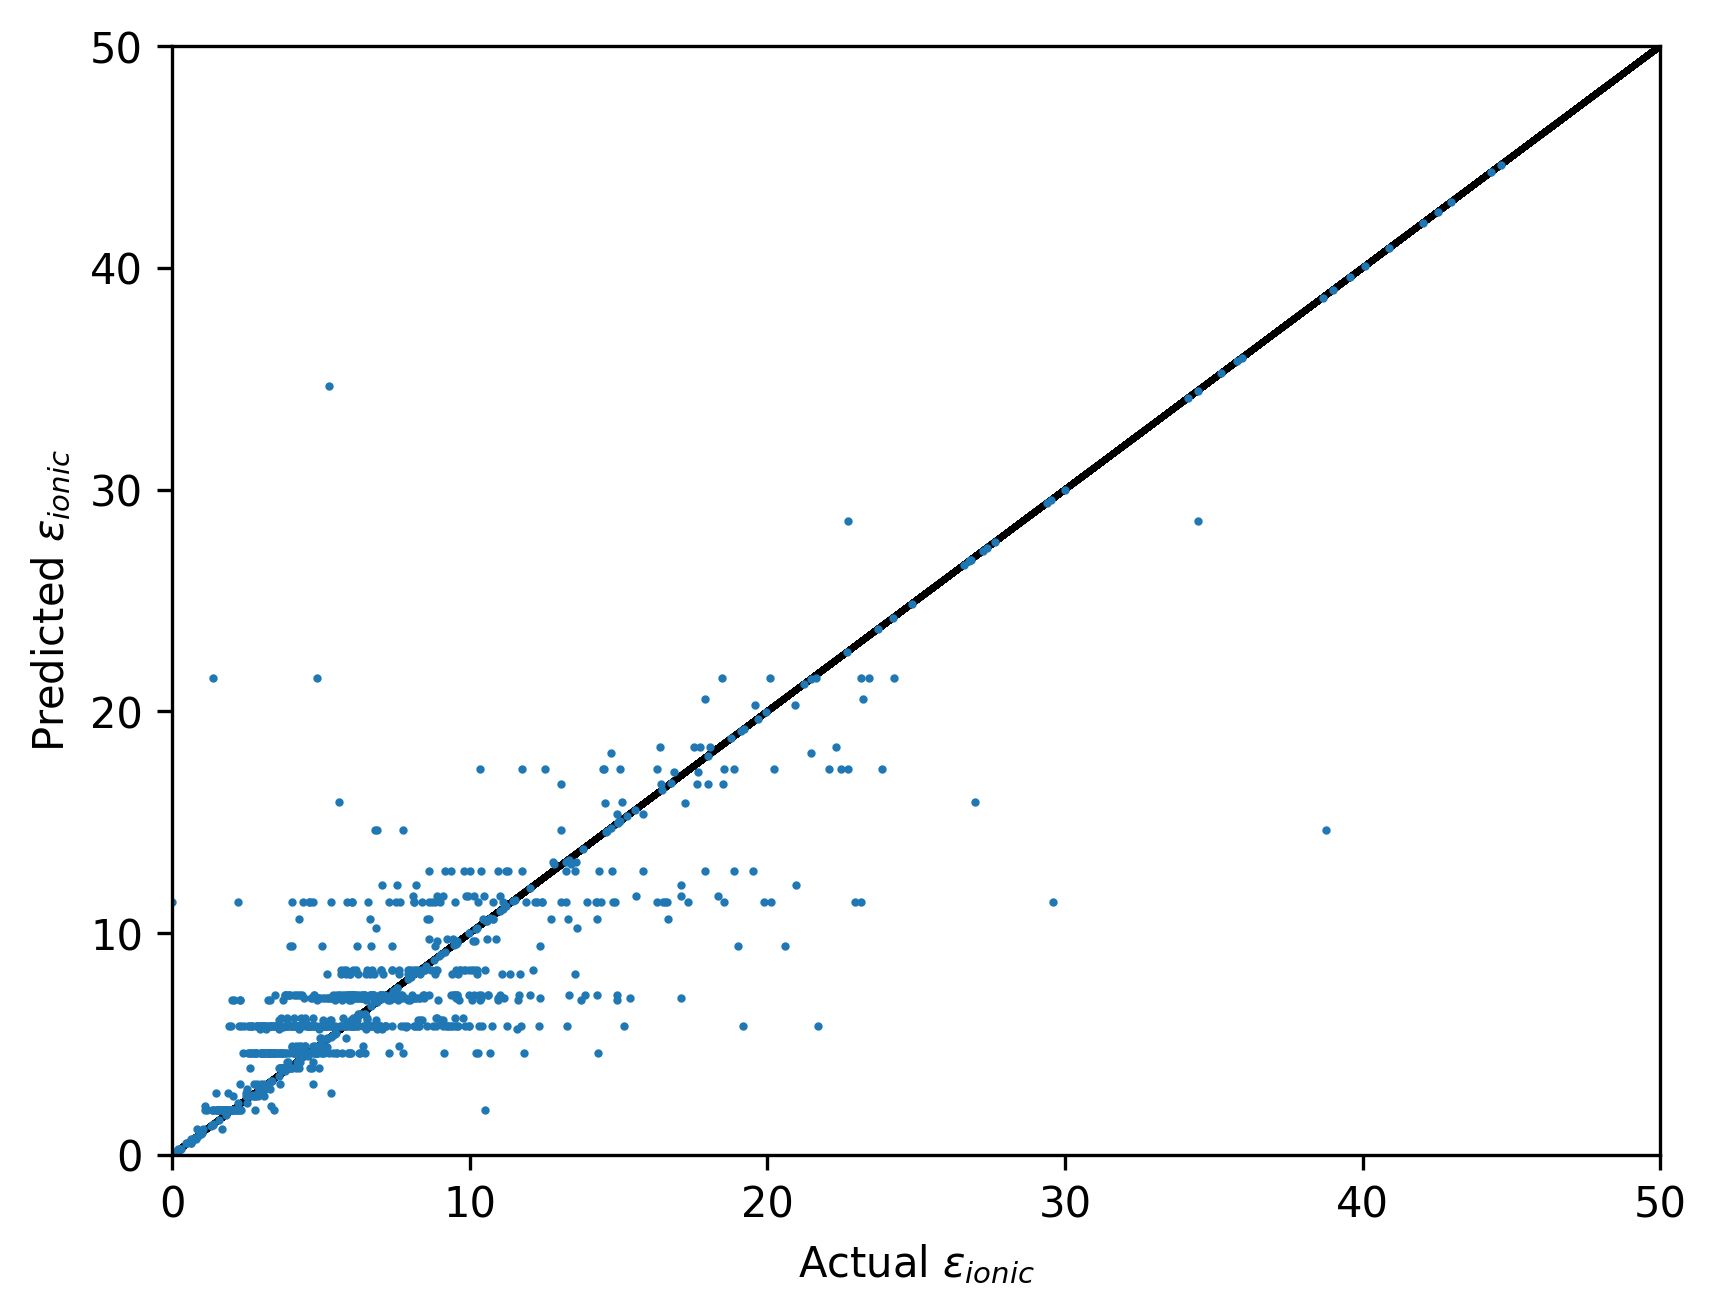

MSE: 4747.765109142702, MAE: 12.348250683500398


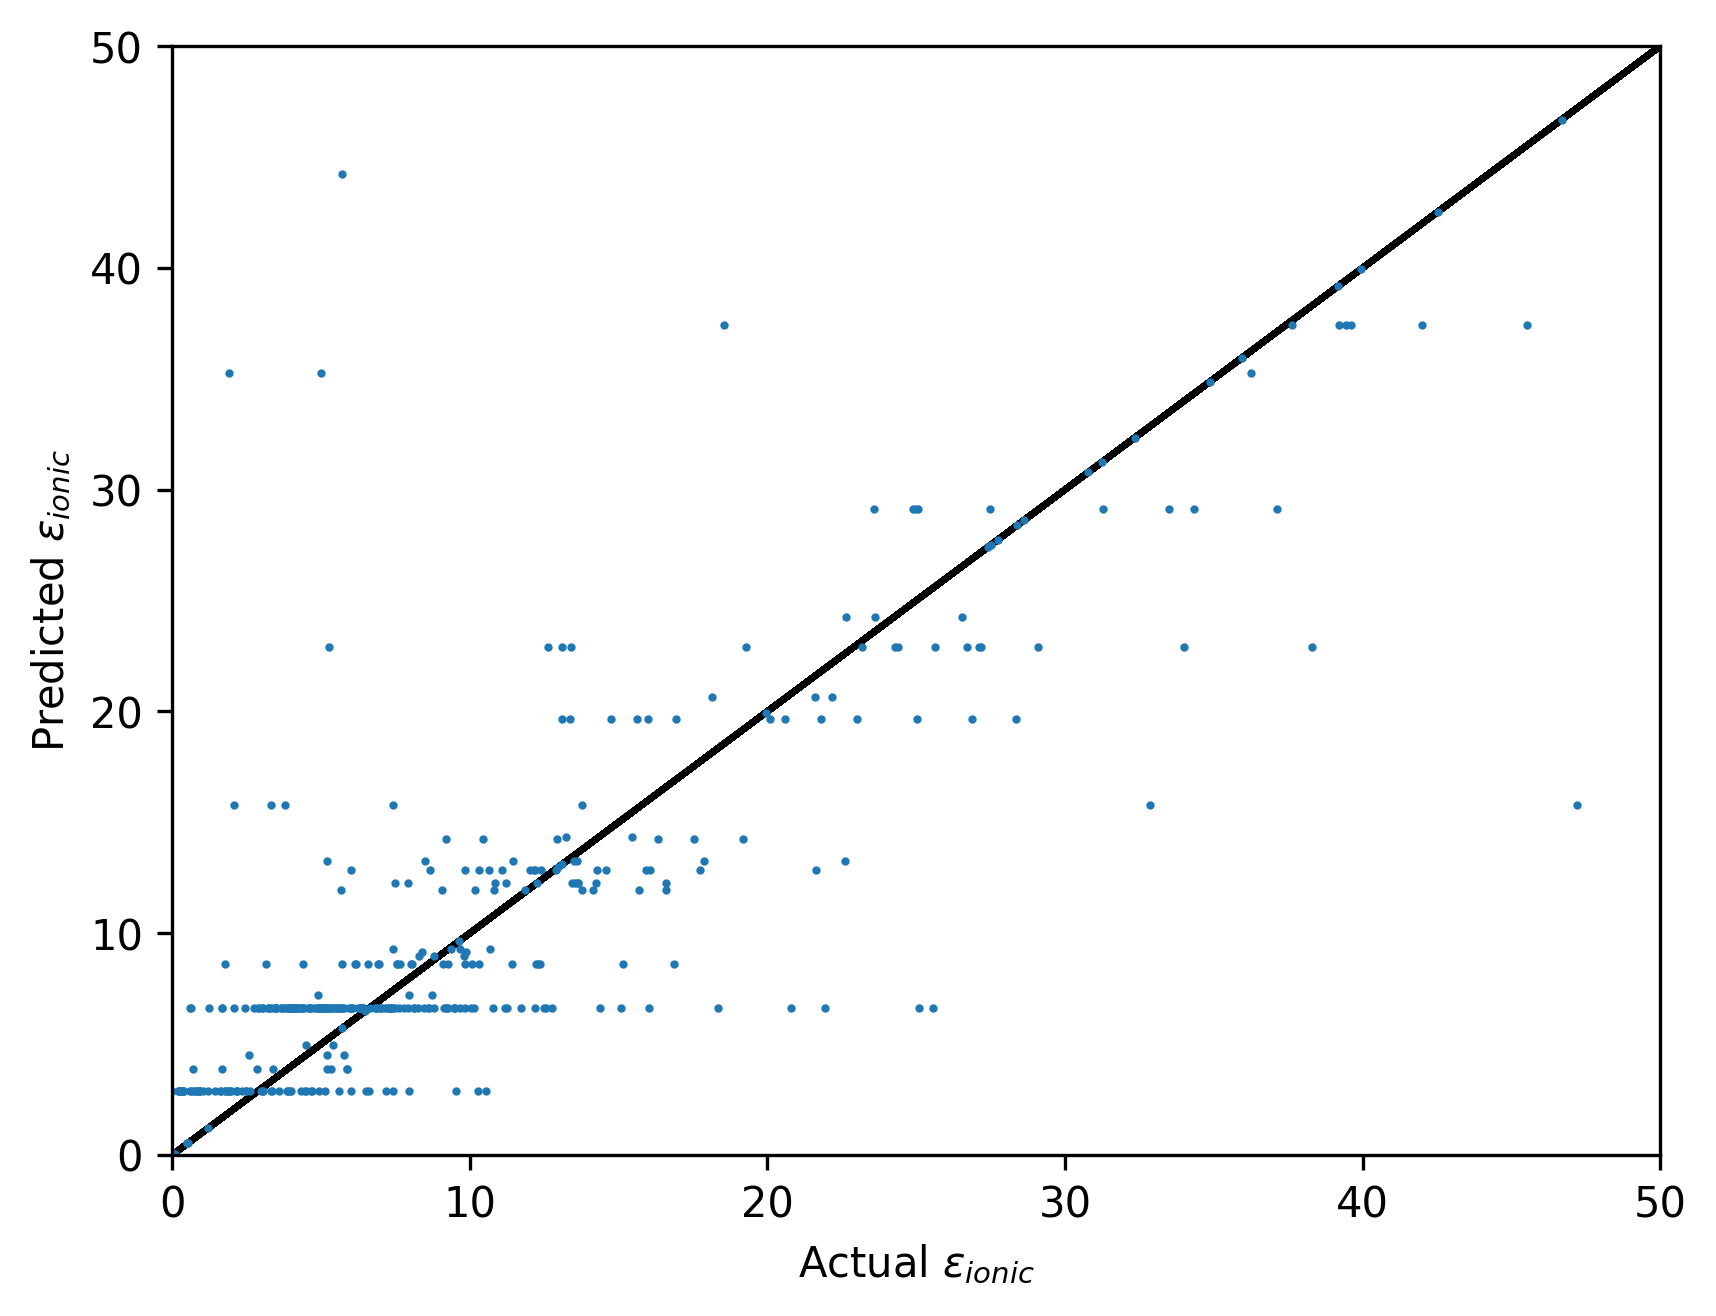

MSE: 186.7774643134695, MAE: 5.802711018496151


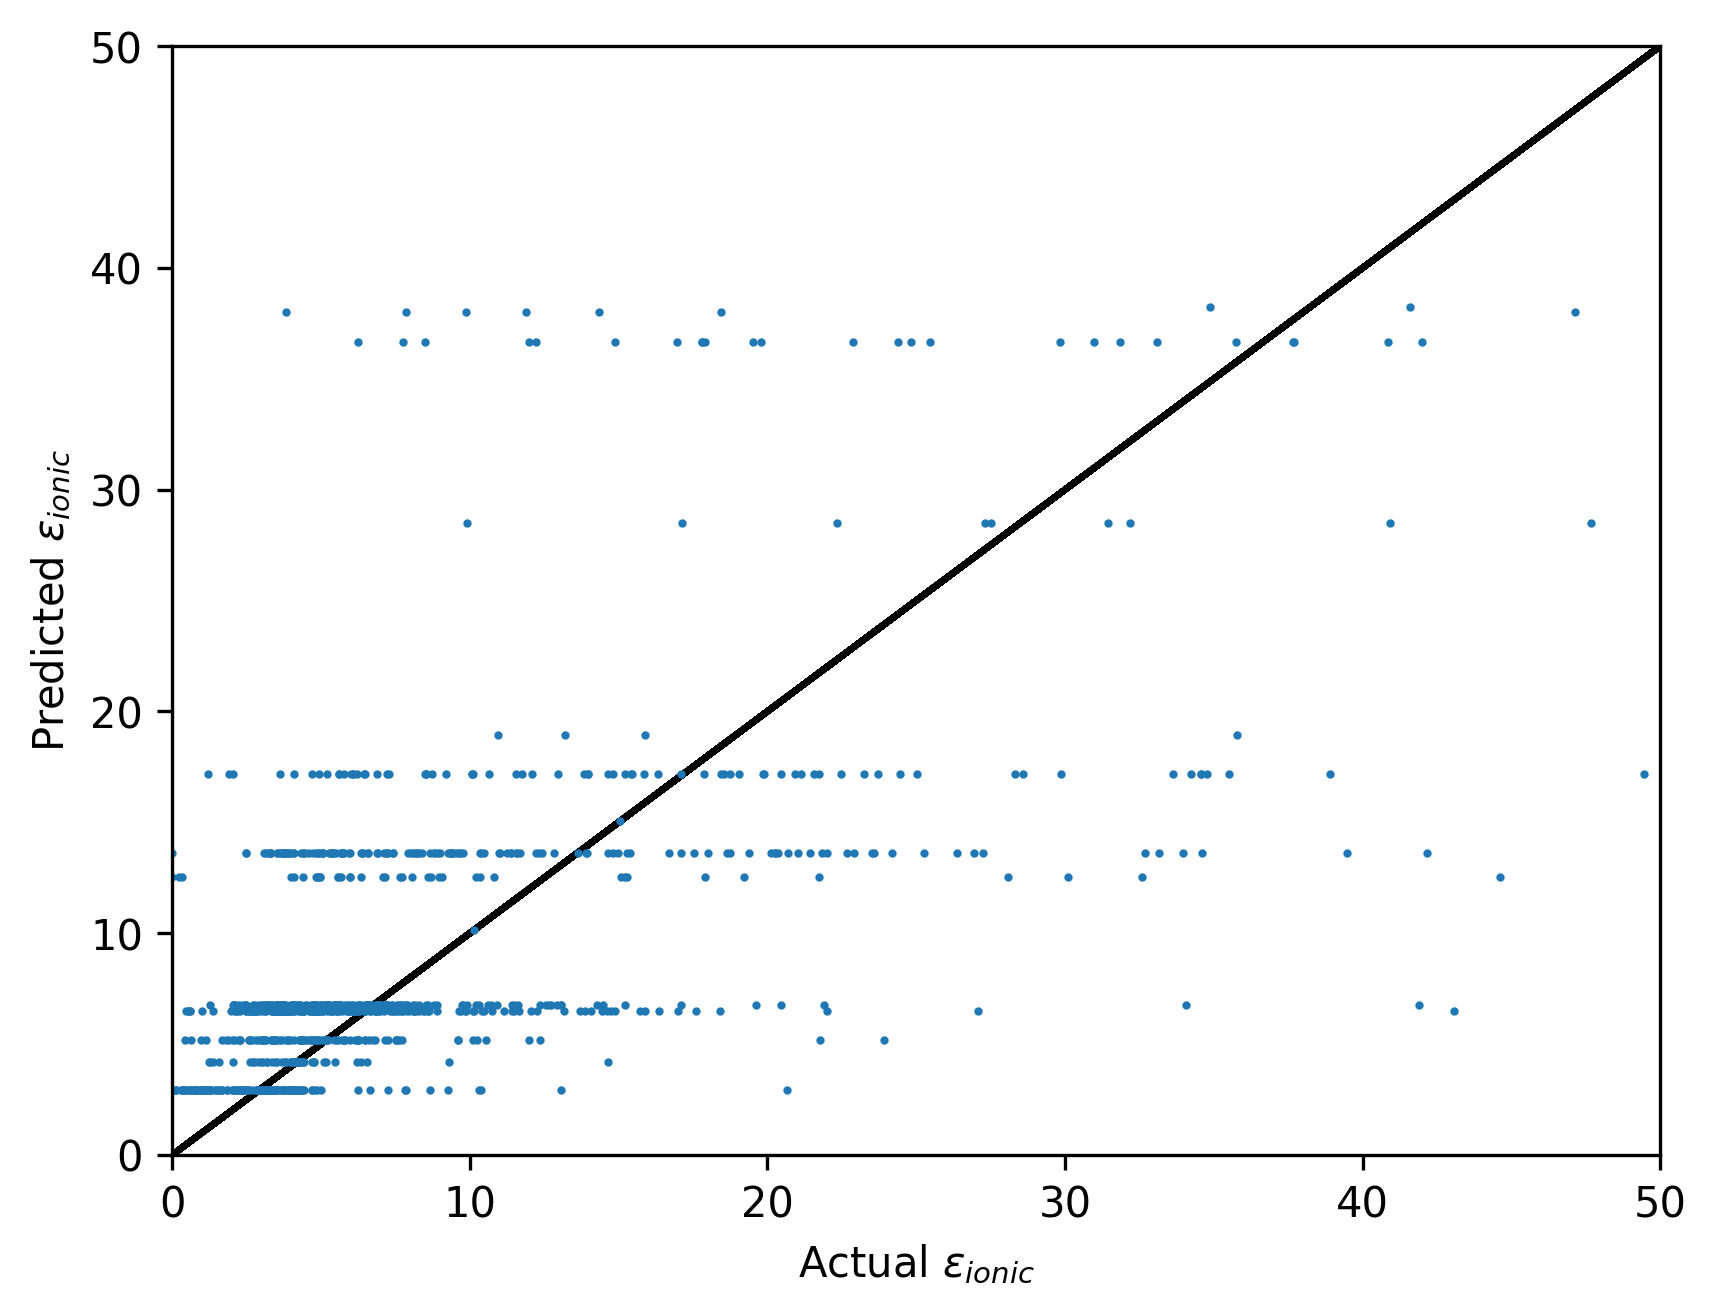

MSE: 2030.7869189967723, MAE: 6.043255354402413


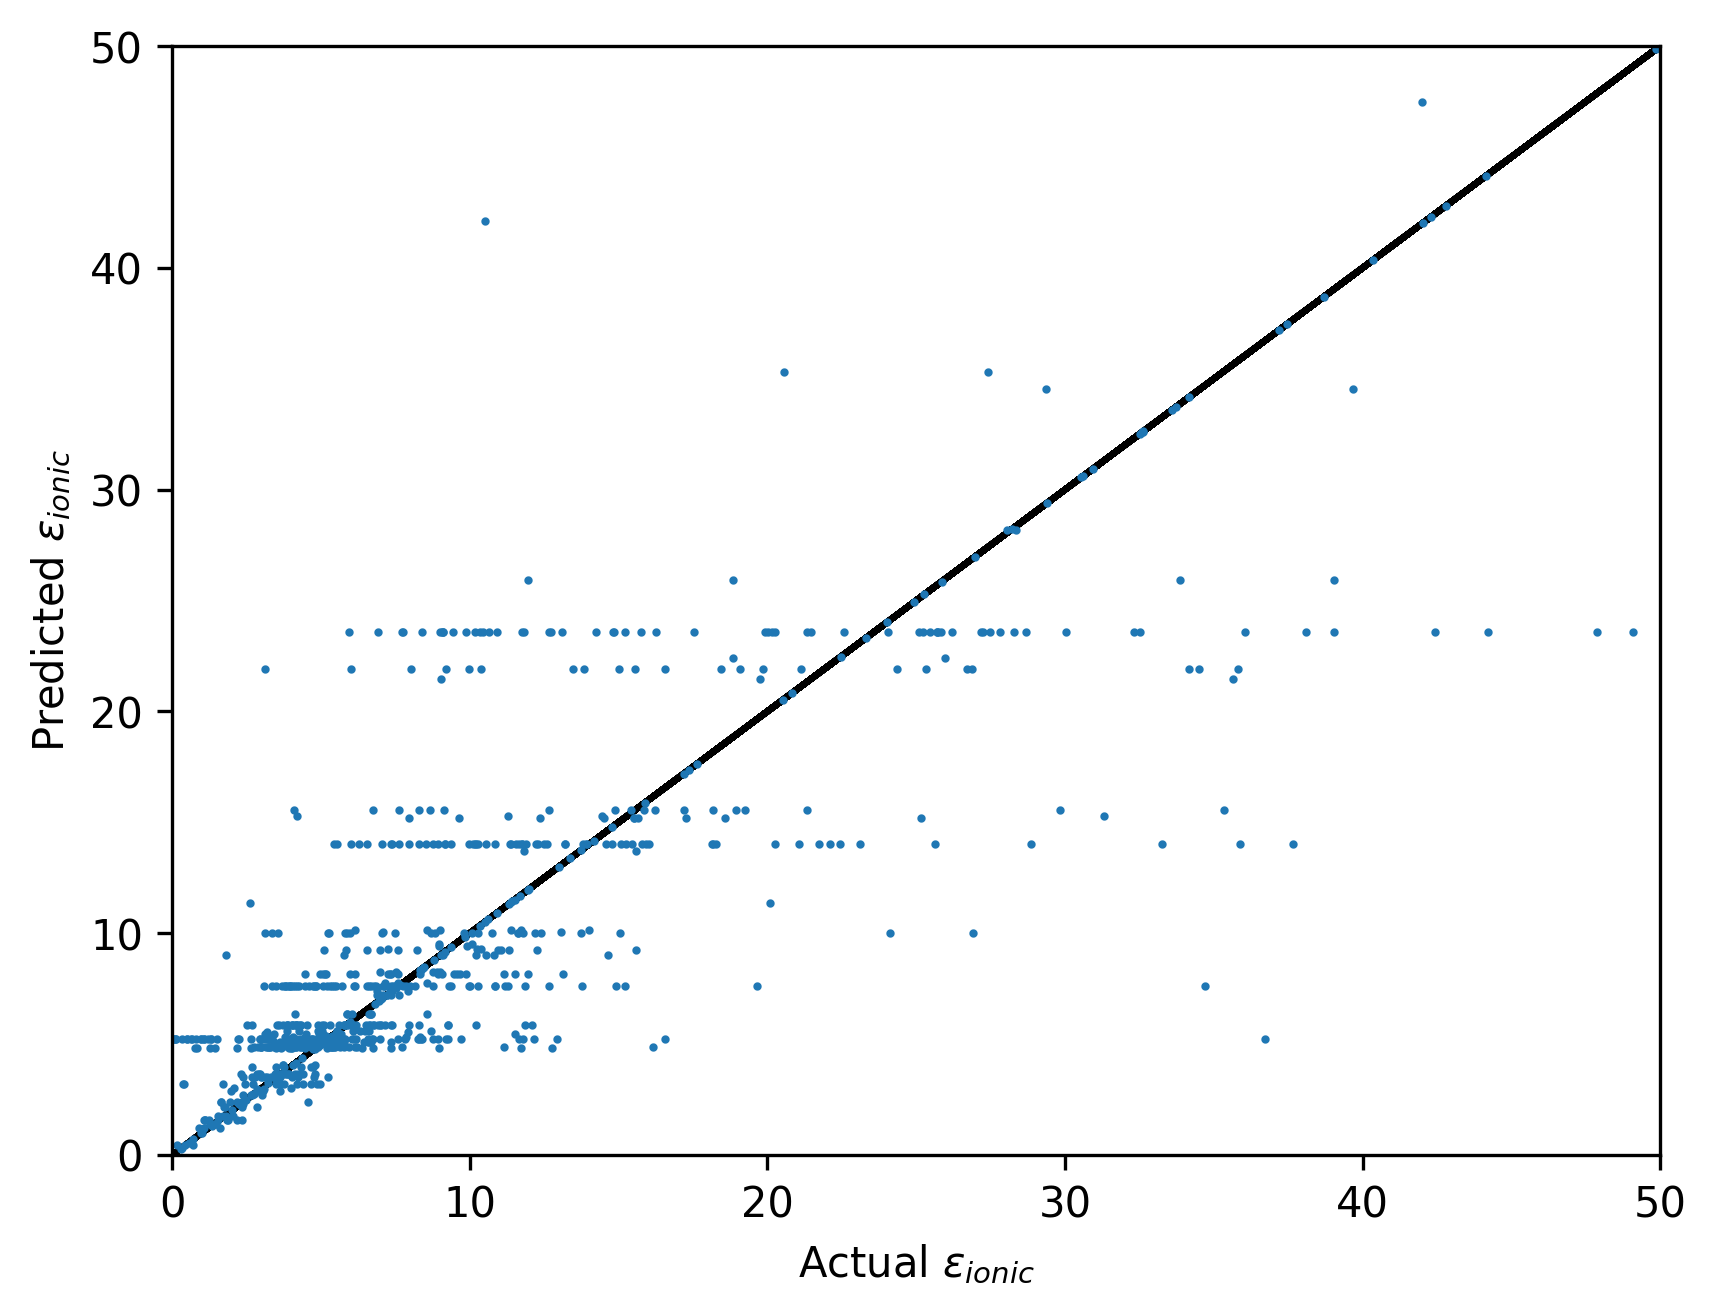

MSE: 7.143271948854359, MAE: 1.520927354827378


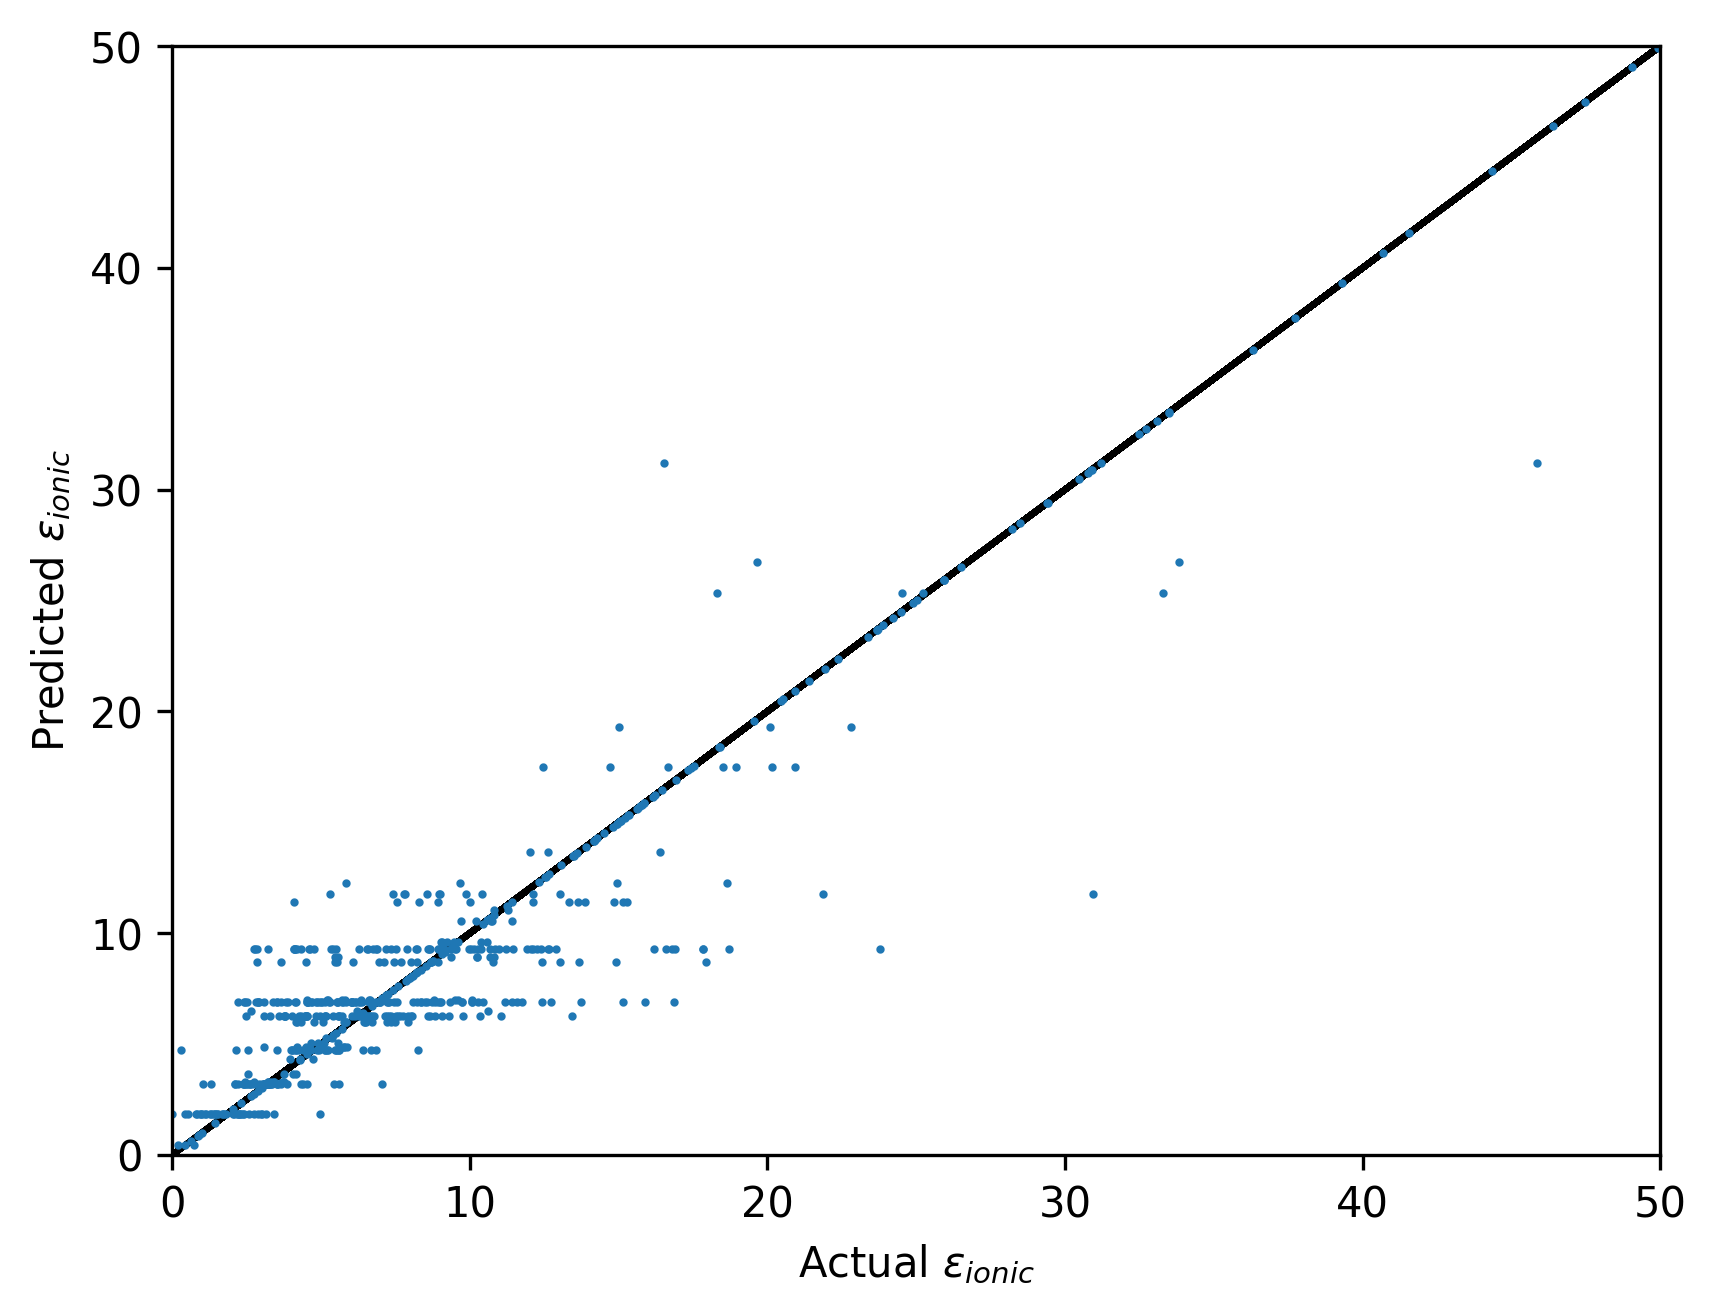

MSE: 8.932558862861818, MAE: 1.5775656866382723


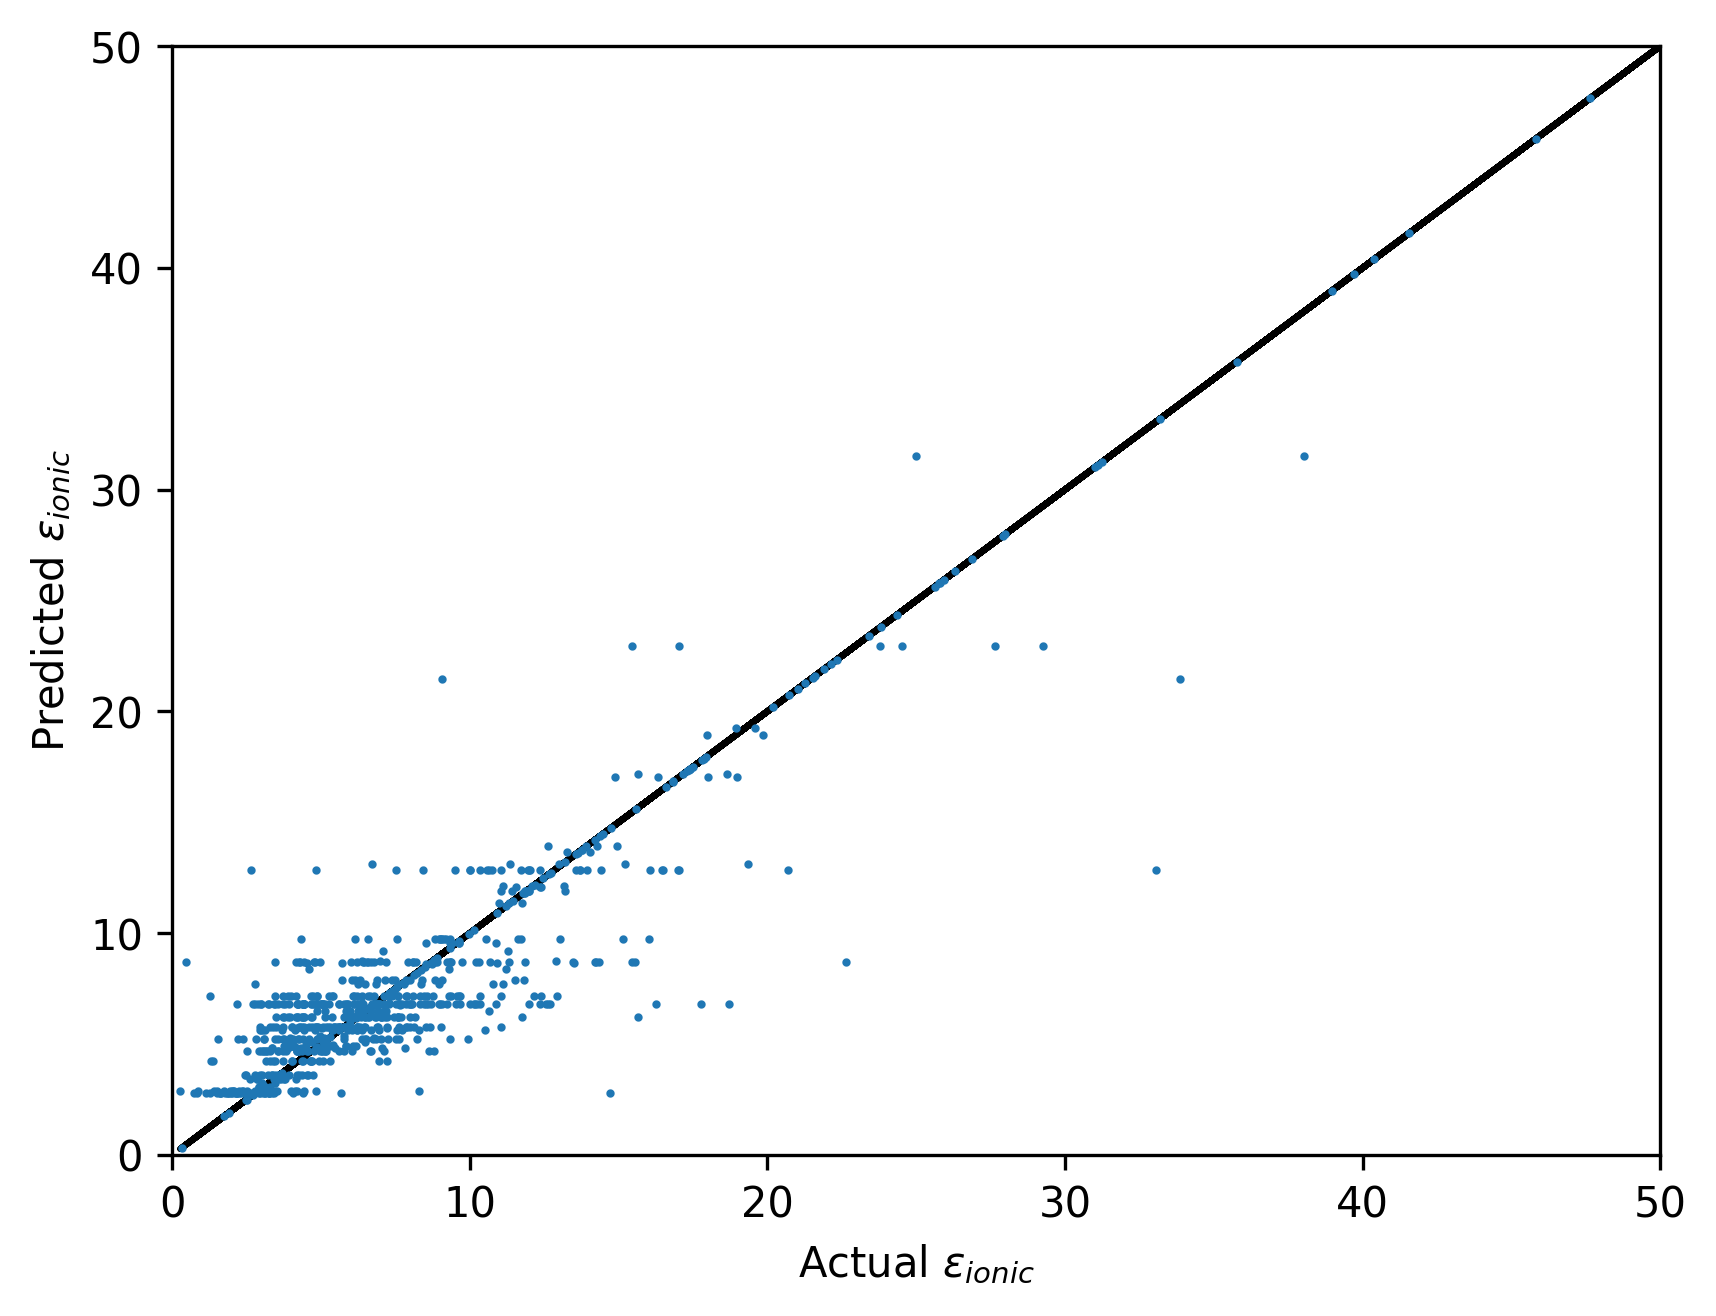

In [19]:
# 对每个group进行训练
dt_models = {}
dt_scalers = {}
best_depths = {}
for group, data_group in grouped_data:
    # 仅训练数据量超过400个的
    if len(data_group) < 400:
        continue
    X, y = get_X_y(data_group)
    scaler, X_scaled = scale(X)
    dt, best_depth = decision_tree(X_scaled, y)
    dt_models[group] = dt
    dt_scalers[group] = scaler
    best_depths[group] = best_depth

In [20]:
best_depths

{0: 11, 3: 7, 4: 5, 6: 10, 7: 13, 9: 10}

##### 模型测试

MSE: 5745.446311248364, MAE: 15.032061466625304


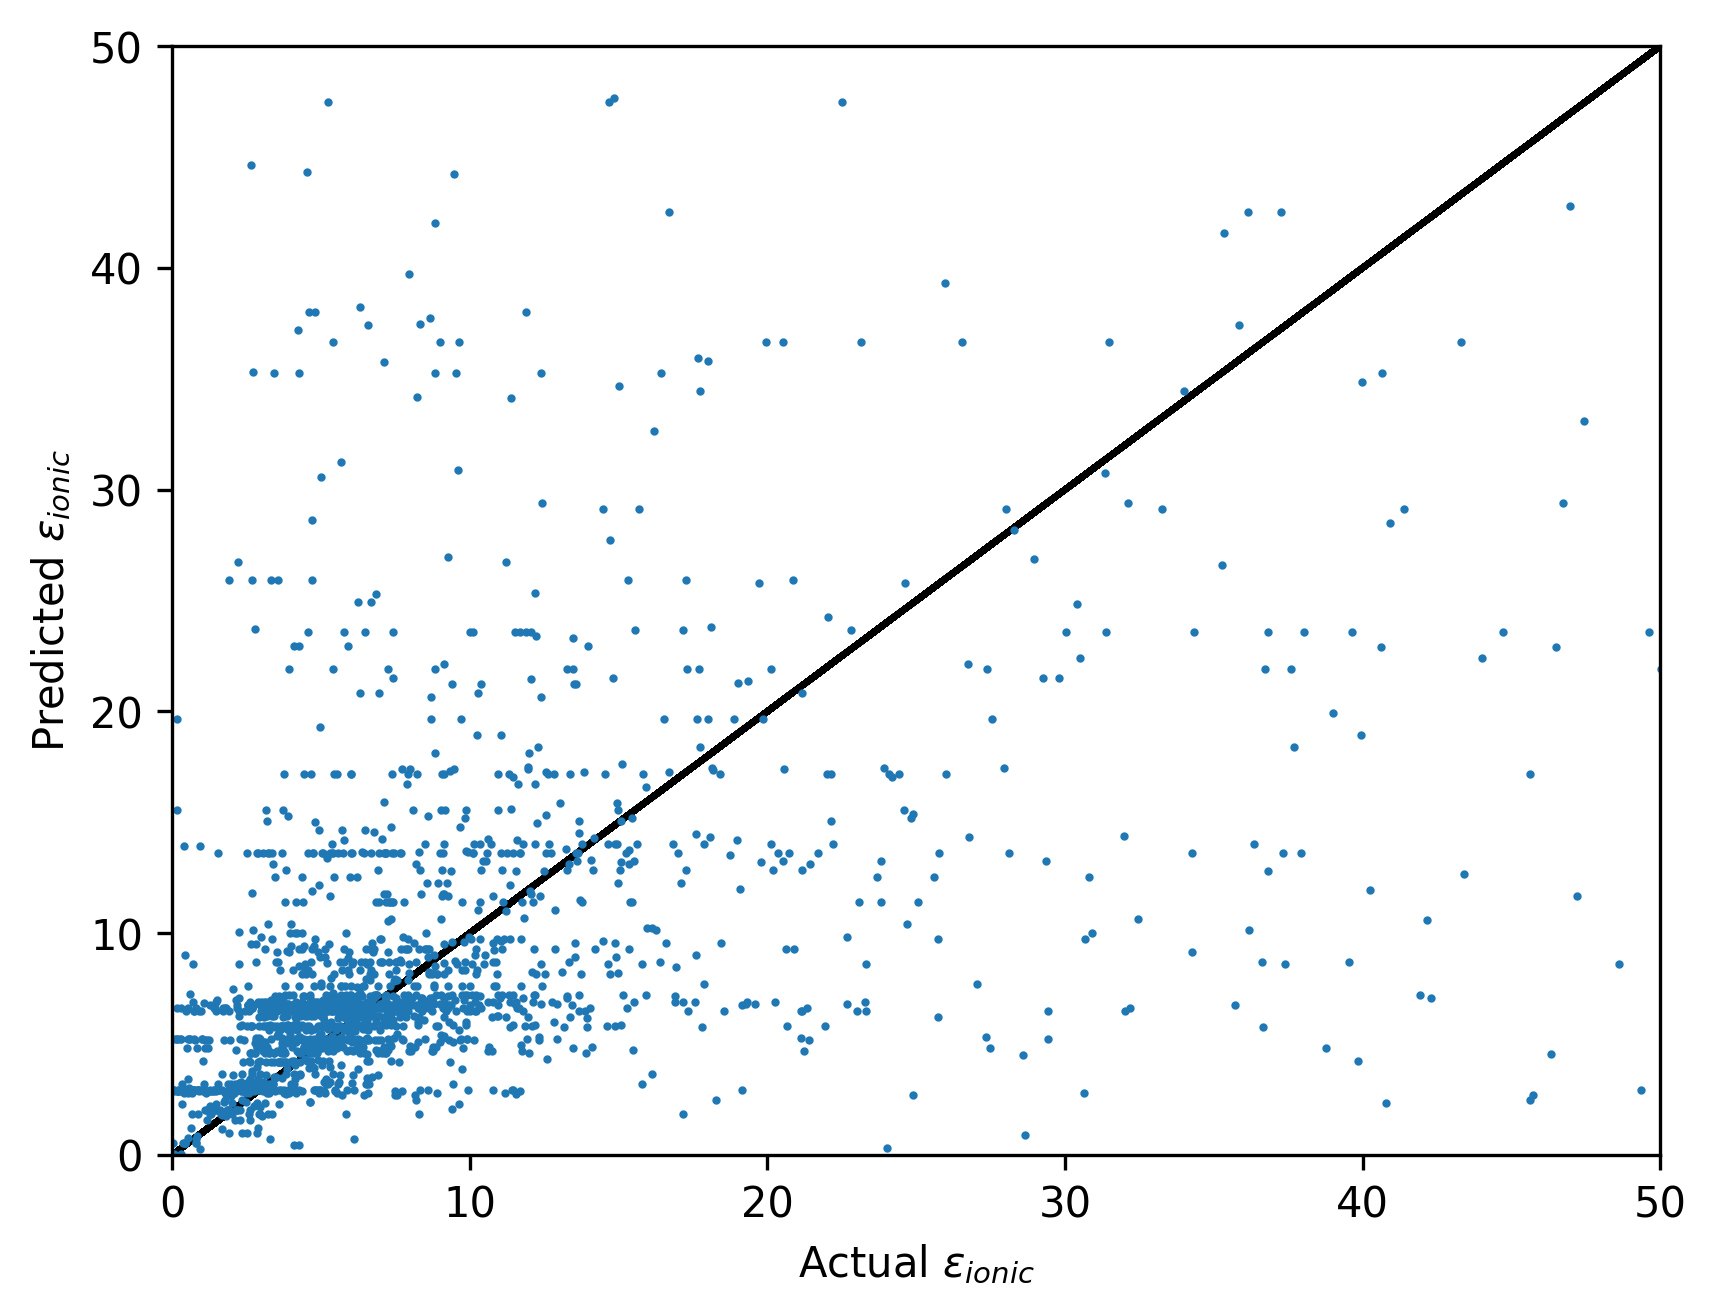

In [21]:
model_test(X_test, dt_models, dt_scalers);

#### 3. 随机森林算法

In [22]:
from sklearn.ensemble import RandomForestRegressor
def random_forest(X_train, y_train, best_depth):
    # 模型训练
    rf = RandomForestRegressor(n_estimators=100, max_depth=best_depth, random_state=RANDOM_STATE)
    rf.fit(X_train, y_train)
    # 模型训练集测试
    mse, mae, y_pred = model_eval(dt, X_train, y_train)
    # 绘制结果
    plot_cross_val_scores(mse, mae, y_pred, y_train)
    return rf

MSE: 1494.0885071092493, MAE: 10.407980019541352


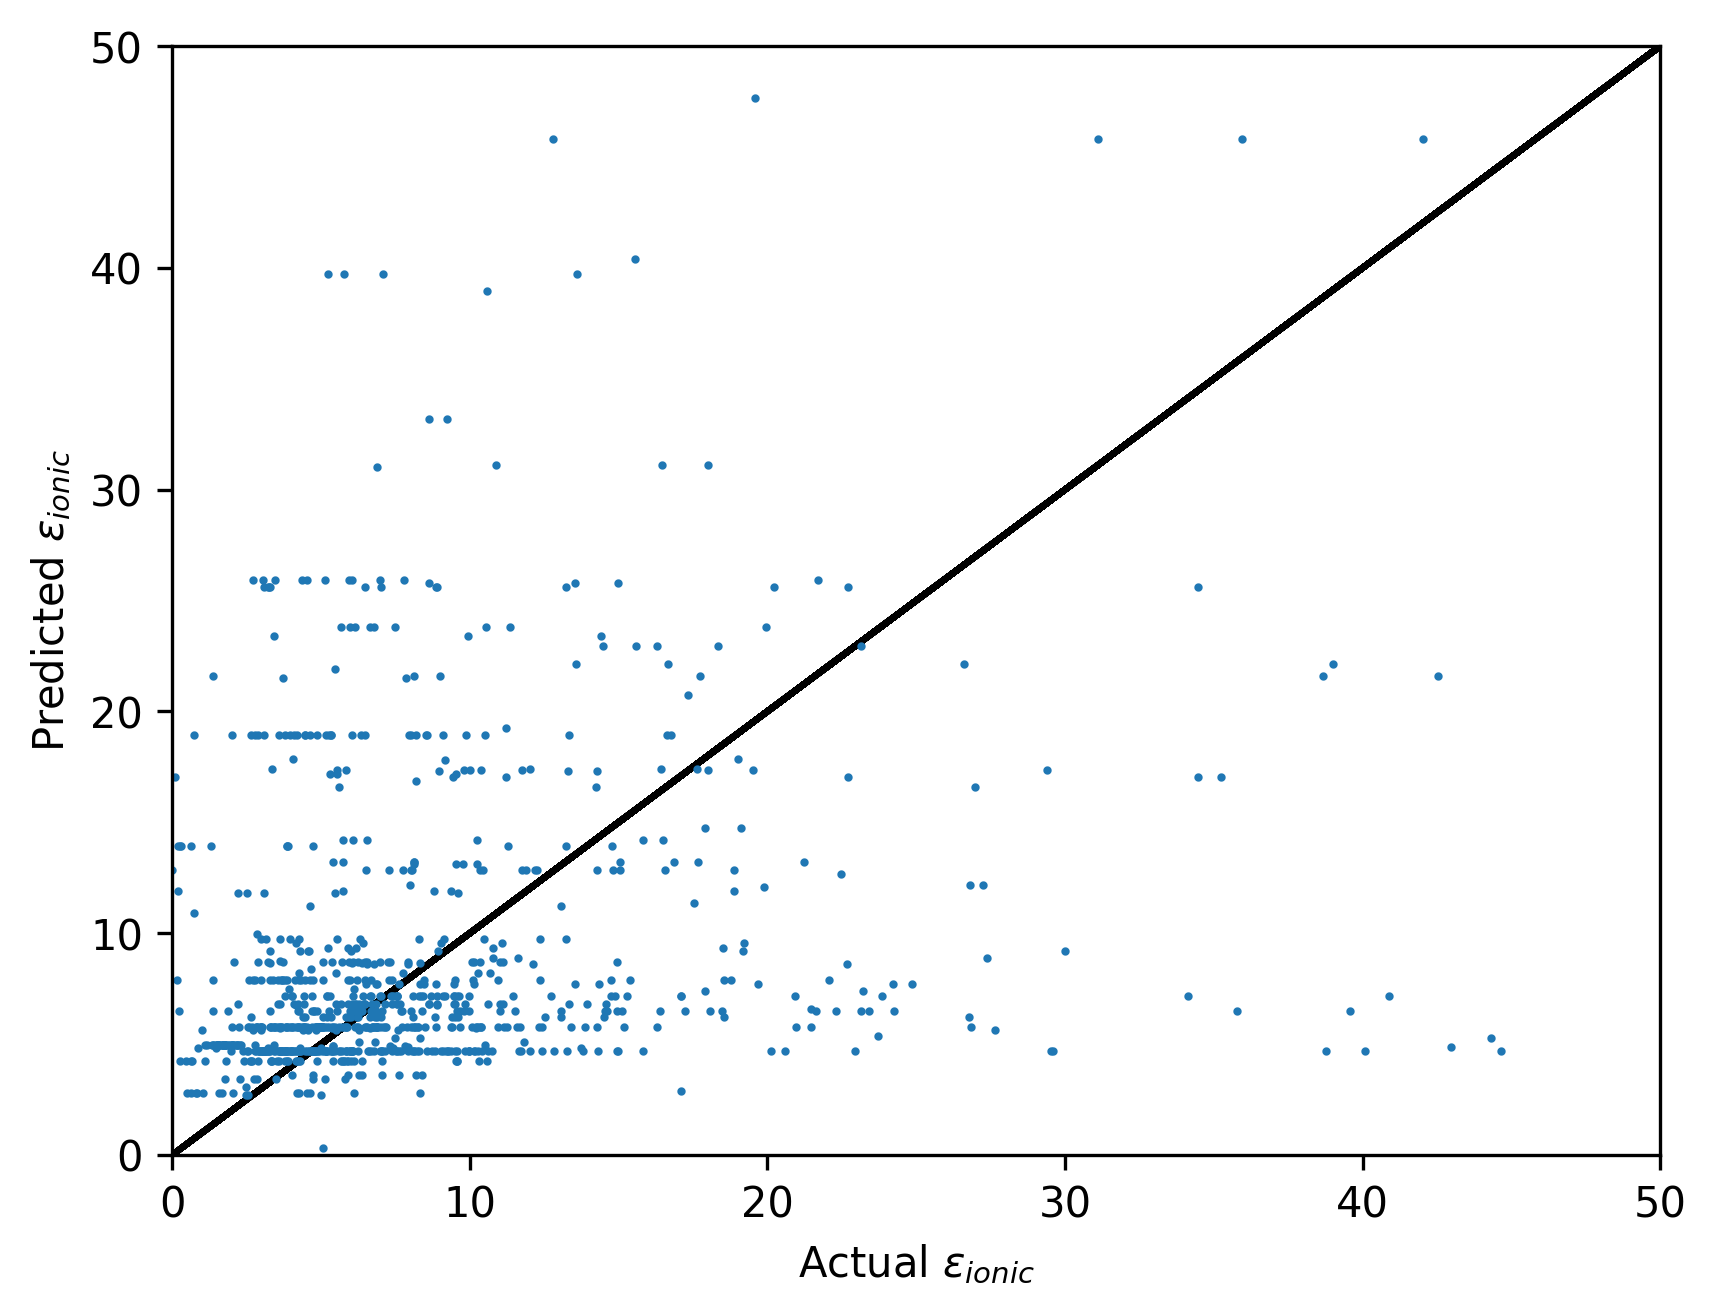

MSE: 13298.616803113191, MAE: 24.497758104176924


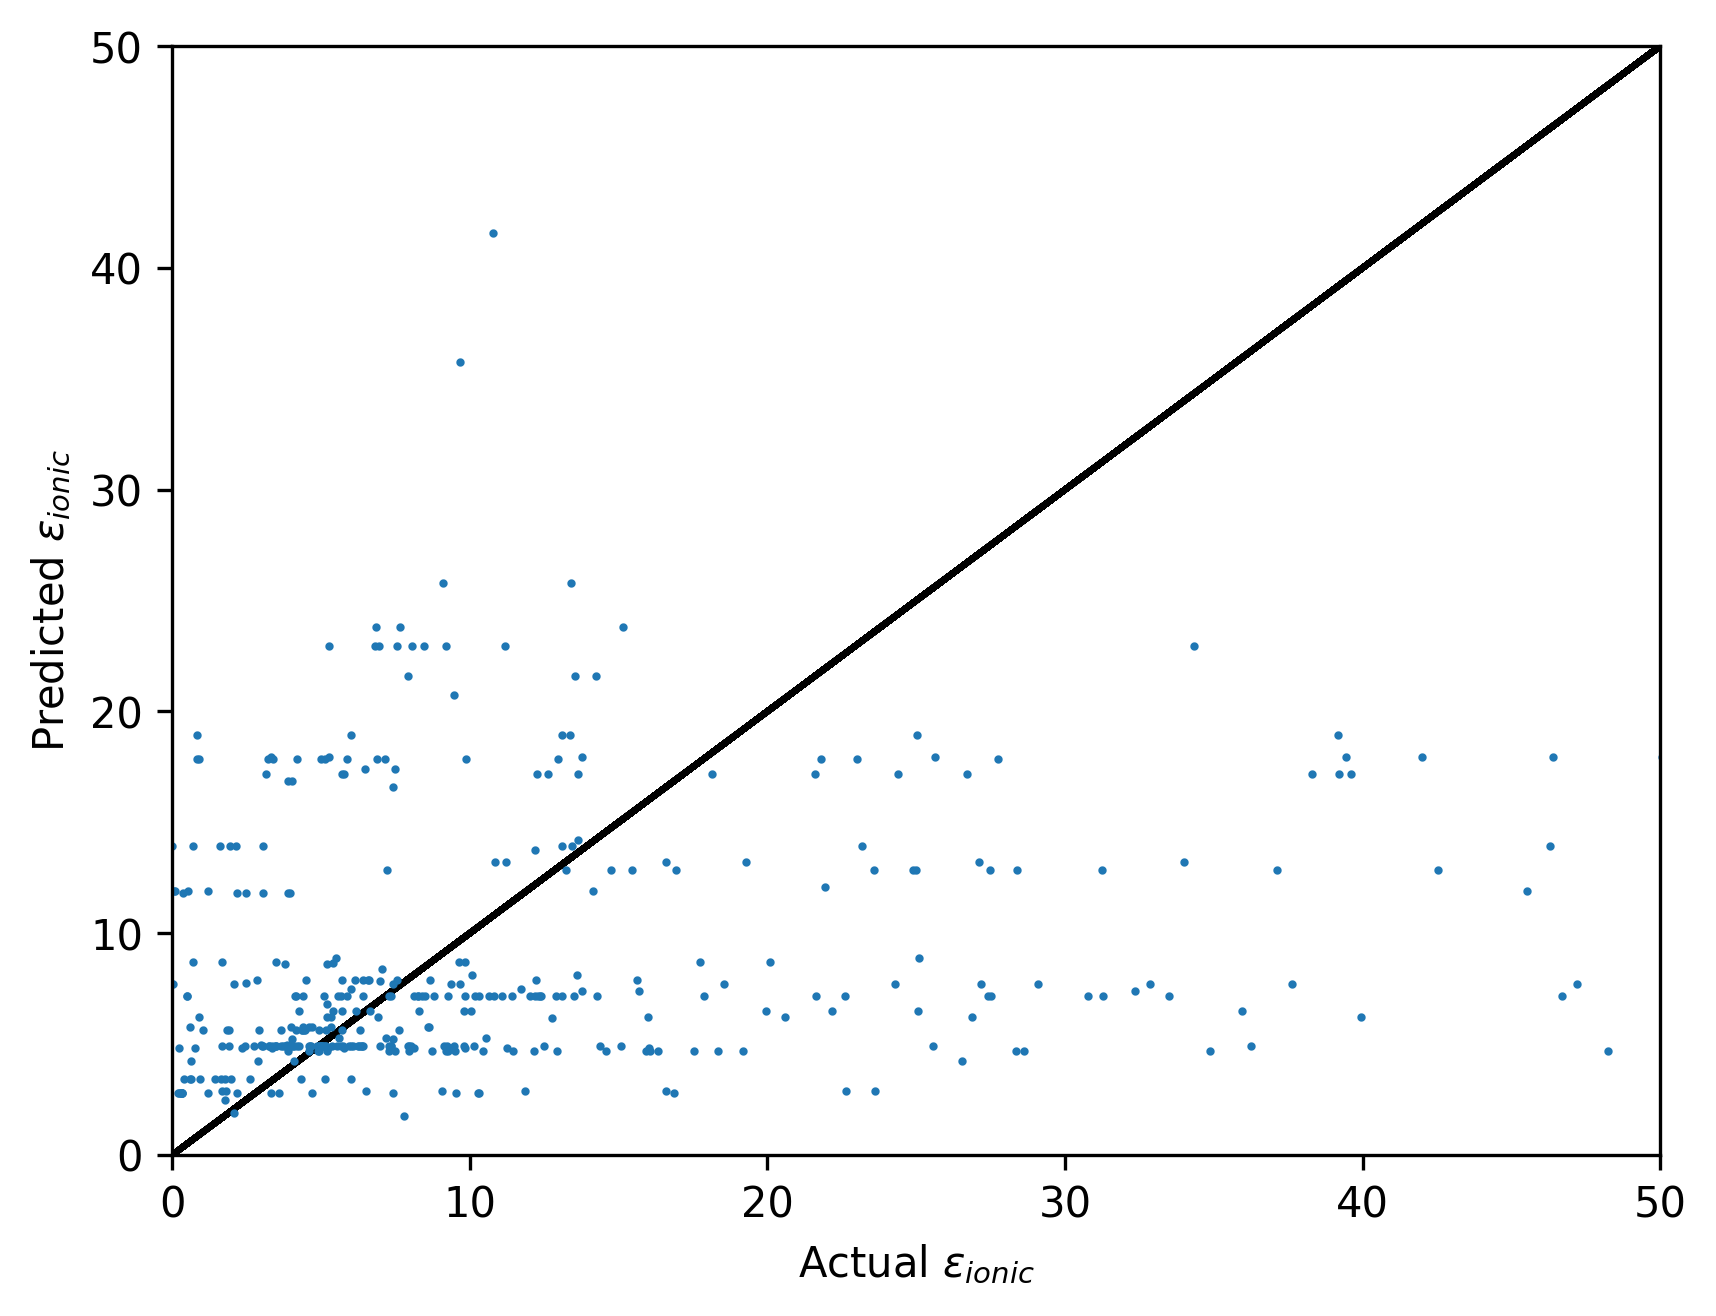

MSE: 1005.5987600163121, MAE: 12.190164797666943


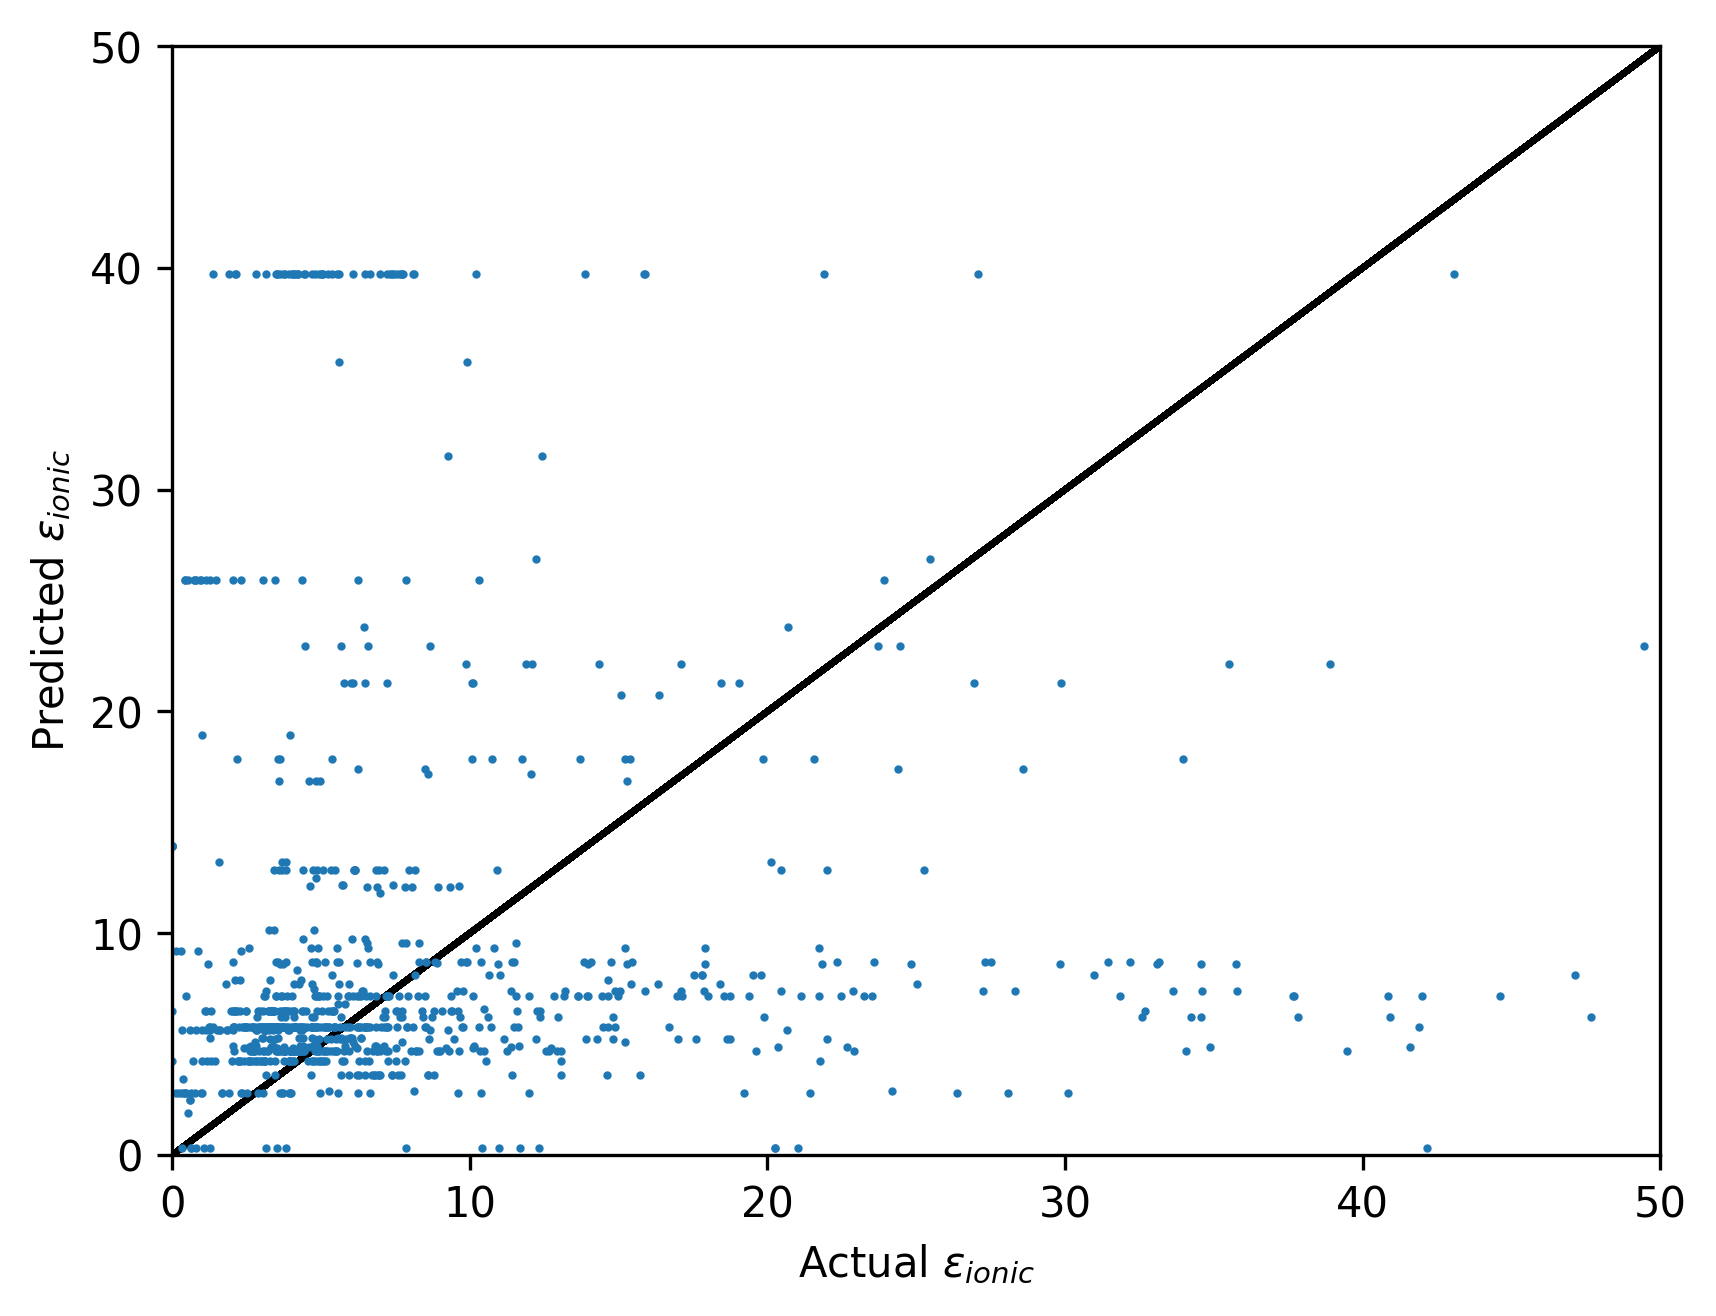

MSE: 5877.609997777617, MAE: 16.850964641330428


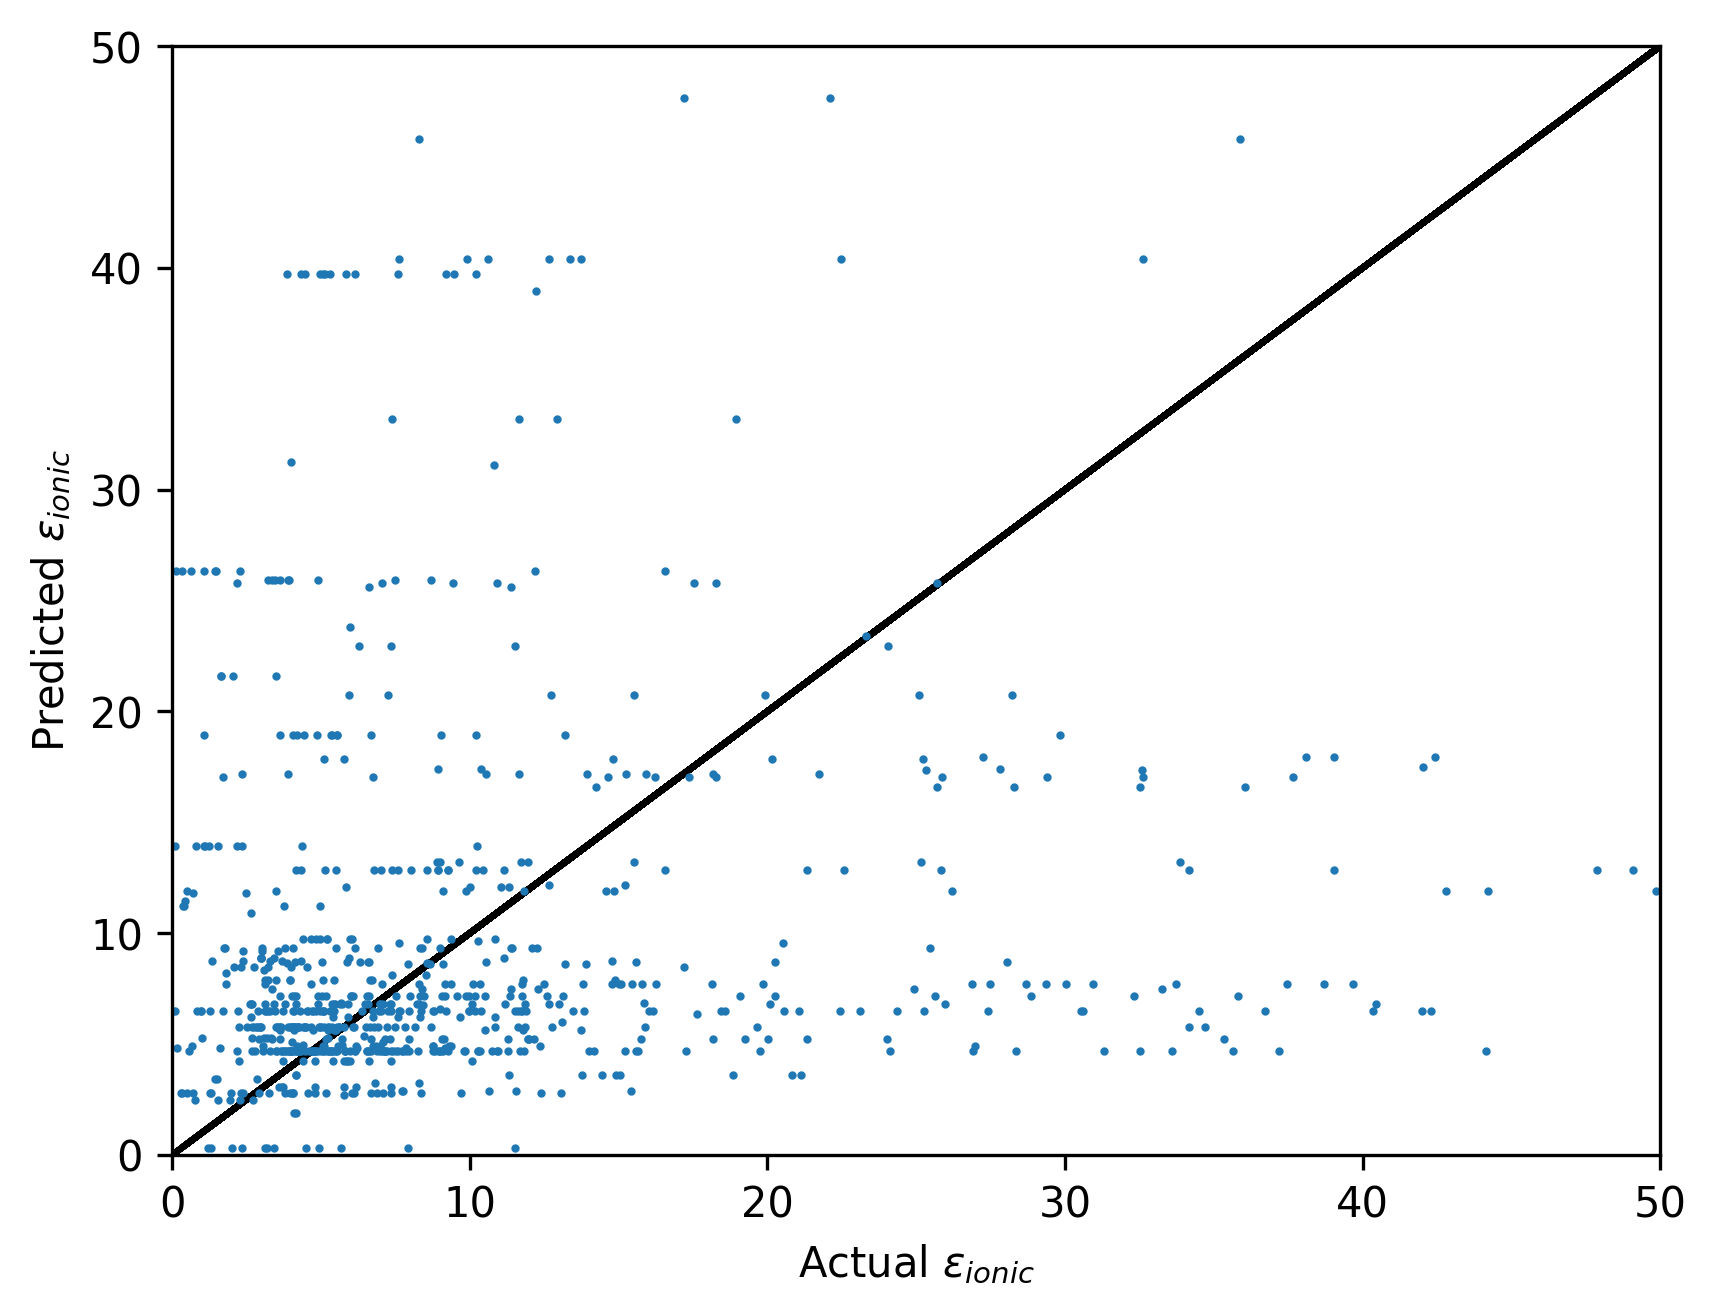

MSE: 3261.3227662357654, MAE: 18.63359301973042


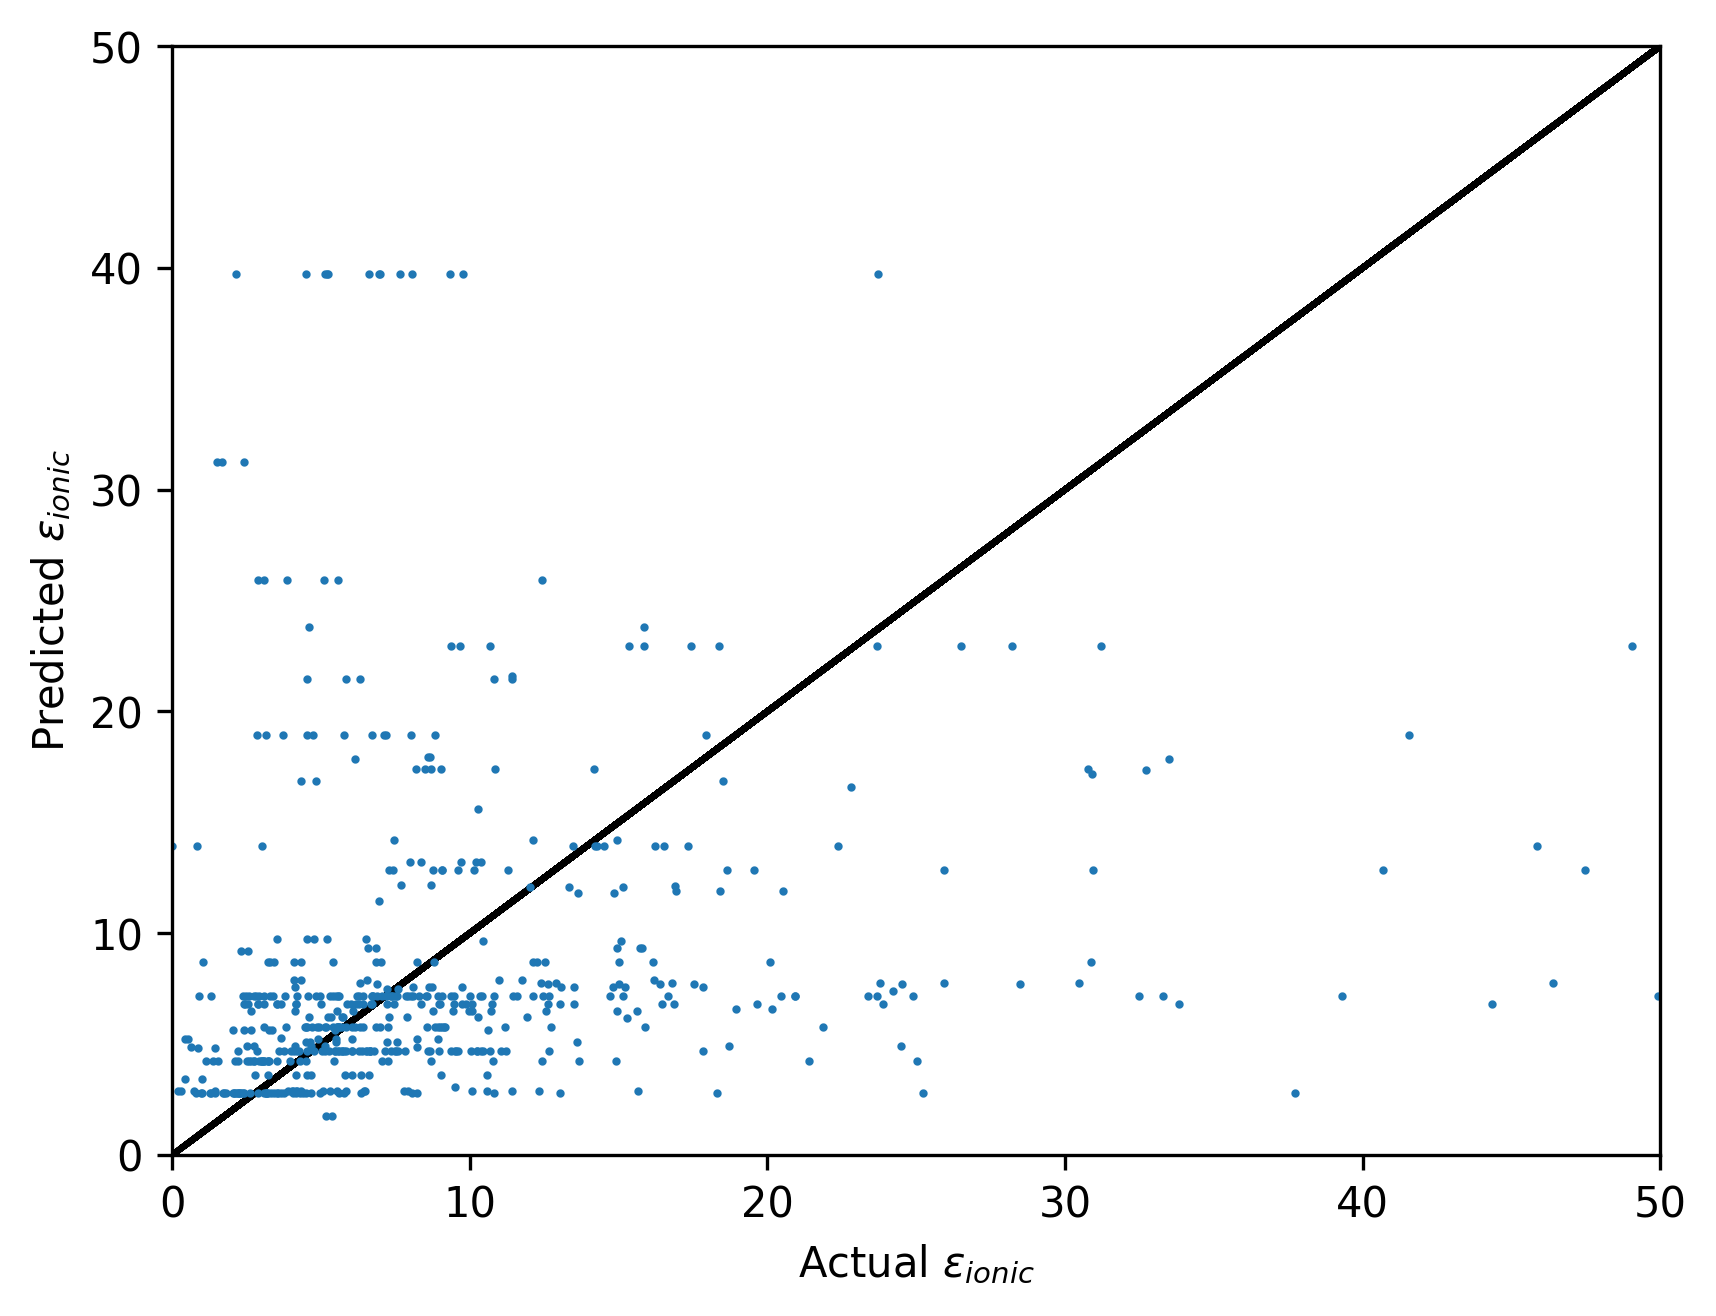

MSE: 8.932558862861818, MAE: 1.5775656866382723


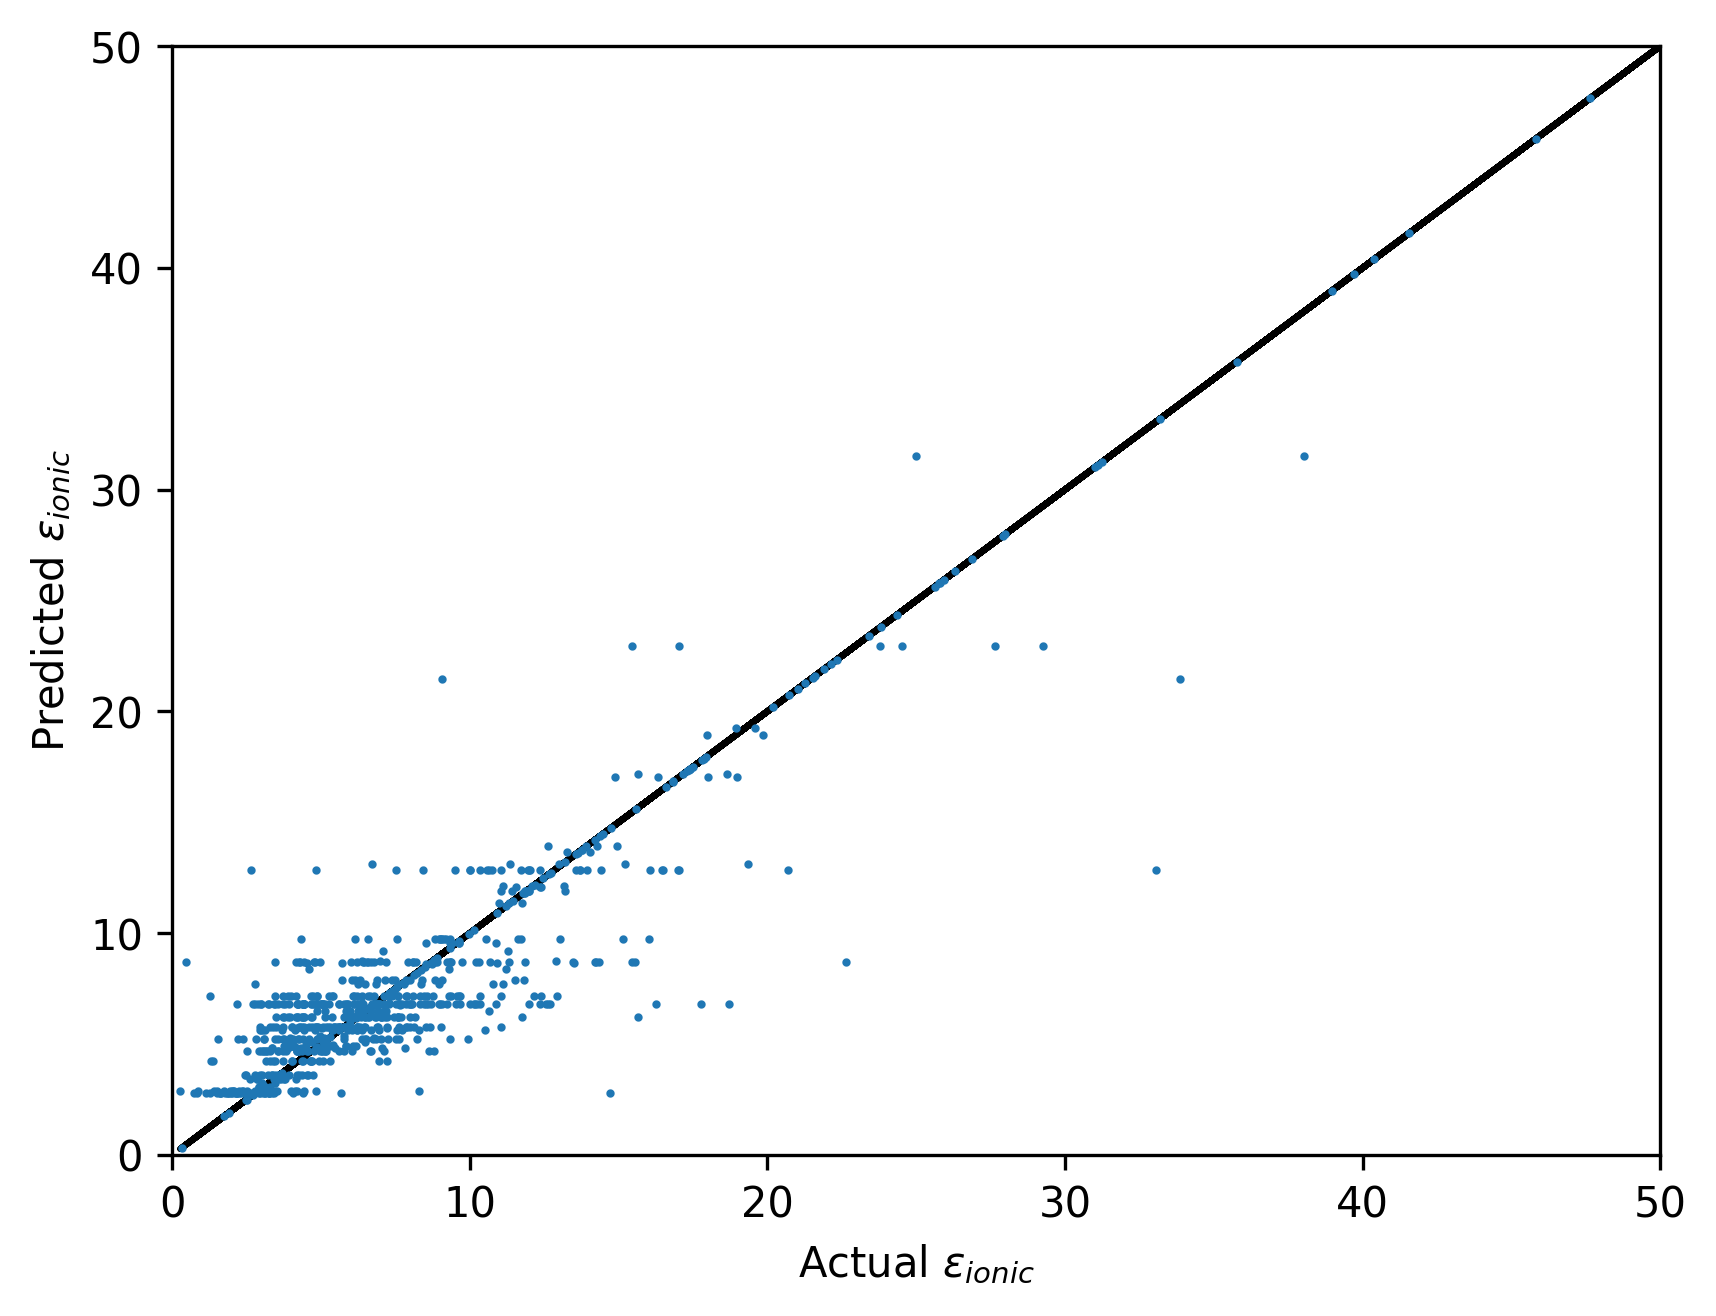

In [23]:
# 对每个group进行训练
rf_models = {}
rf_scalers = {}
for group, data_group in grouped_data:
    # 仅训练数据量超过400个的
    if len(data_group) < 400:
        continue
    X, y = get_X_y(data_group)
    scaler, X_scaled = scale(X)
    rf = random_forest(X_scaled, y, best_depths[group])
    rf_models[group] = rf
    rf_scalers[group] = scaler

##### 模型测试

MSE: 1434.1650943693833, MAE: 11.7363505583765


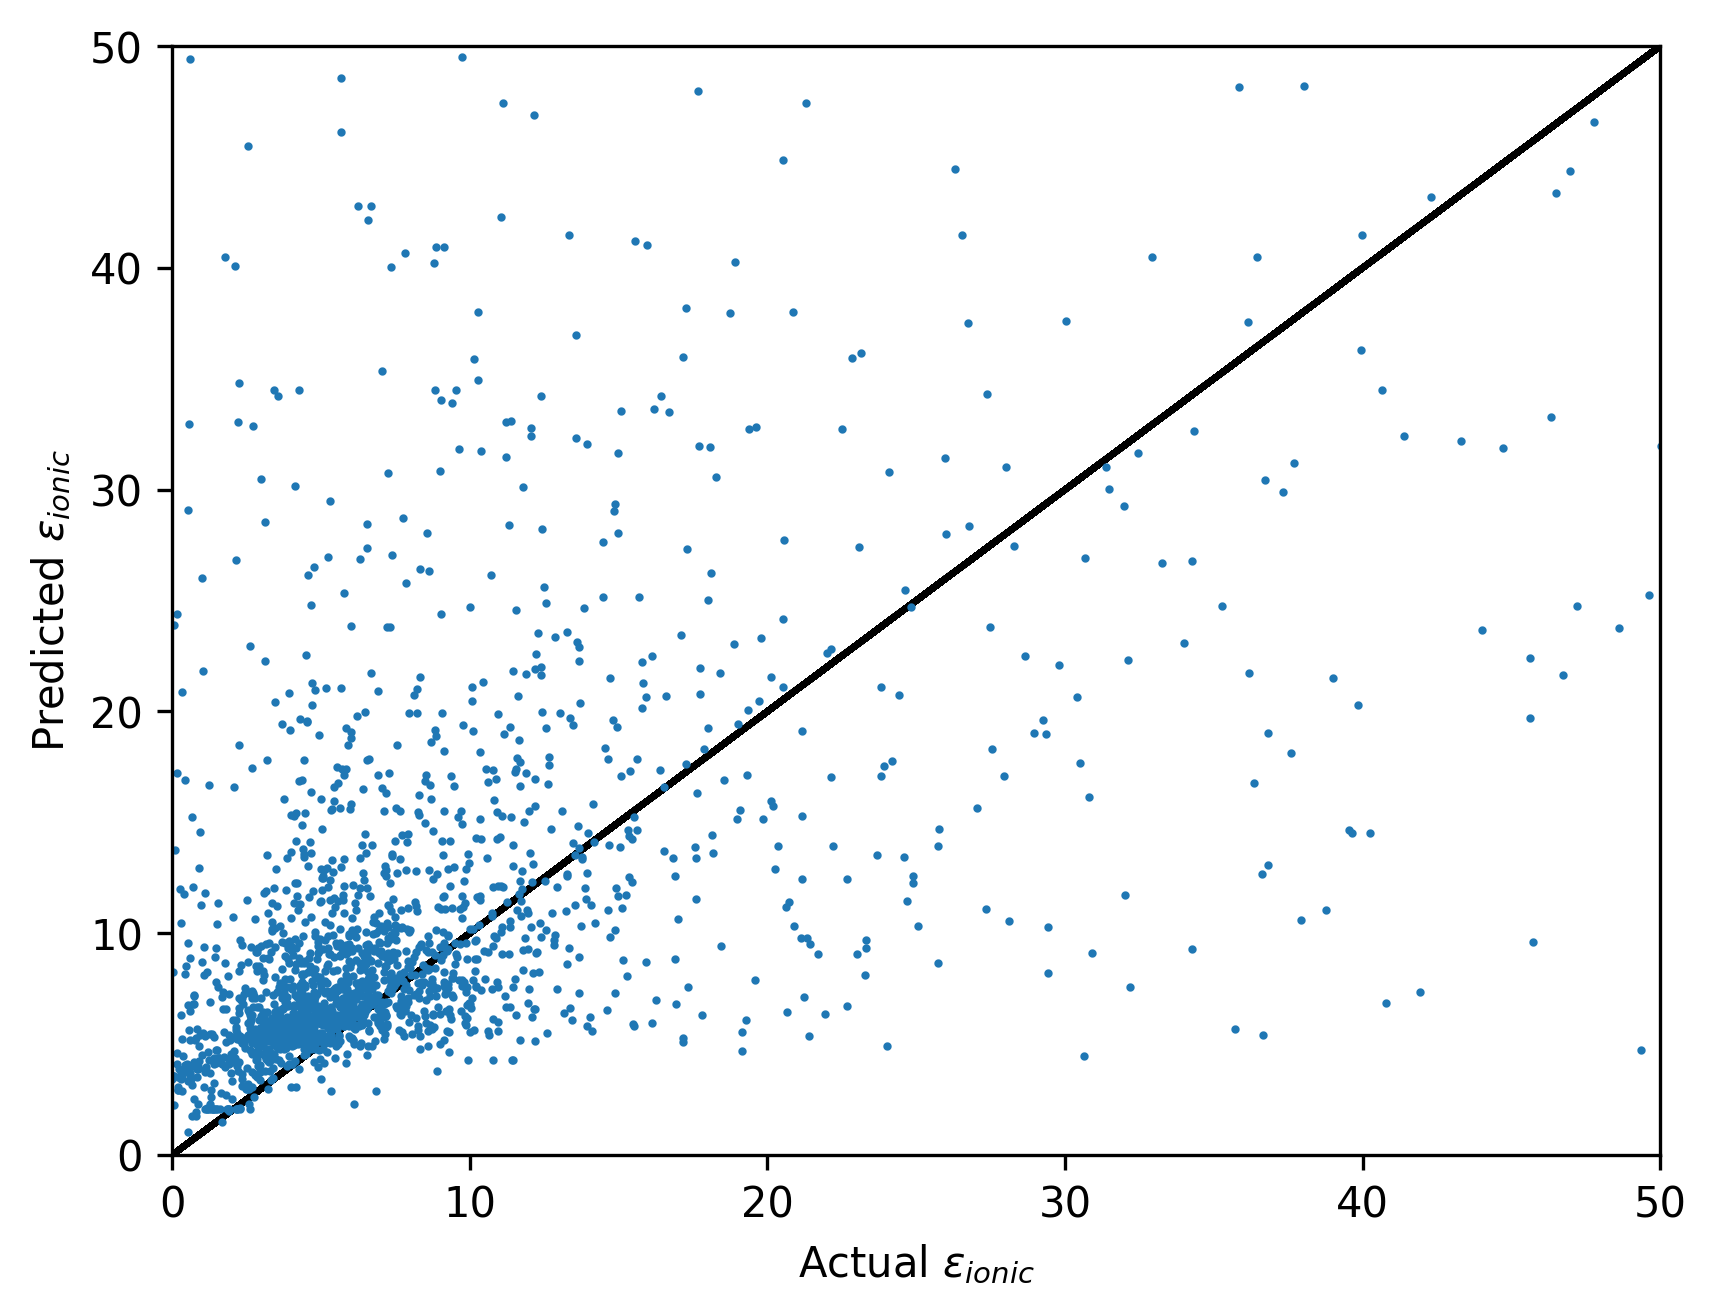

In [24]:
model_test(X_test, rf_models, rf_scalers);

## 保存随机森林算法的预测值

MSE: 1434.1650943693833, MAE: 11.7363505583765


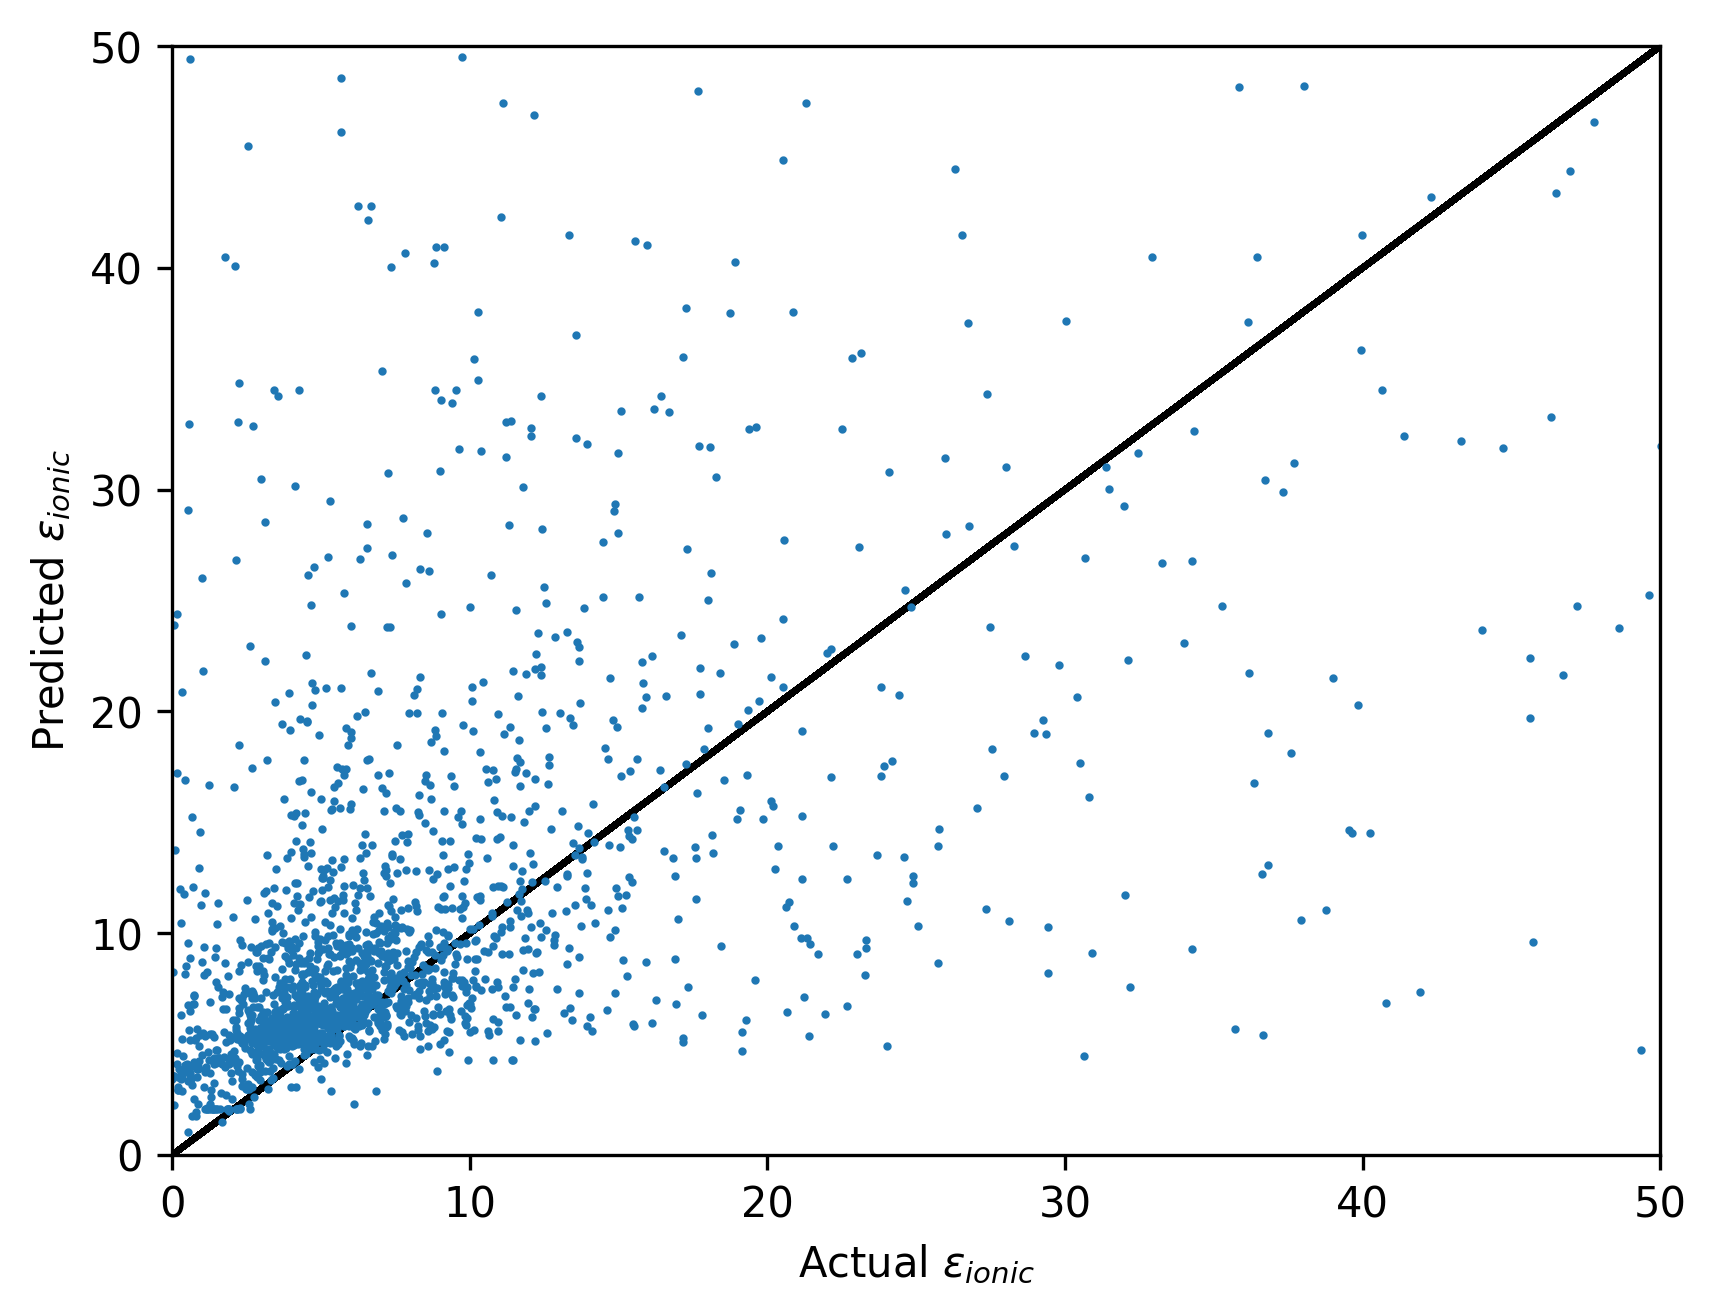

In [25]:
_, _, X_test_rf = model_test(X_test, rf_models, rf_scalers);
# 保存X_test_rf
X_test_rf.to_csv('../../data/groups/test_value/composition_features_test_value/e_ionic_pred.csv', index=False)